<h1 style = "color : Red"> Lending Club Case Study </h1>
<h3 style = "color : Blue">  Submitted by: K Lalithabai Sobha & Ashwani Singh </h3>


### Problem Statement

The Consumer Finance Company wants to identify patterns which indicate a person applying for loan is likely to default or not.This will help them for taking actions such as denying the loan, reducing the loan amount, lending at a higher interest rate etc.This will also help them to ensure that those who are capable of repaying the loan will not be rejected.  
### Aim 
To identify the patterns in terms of consumer attributes and loan attributes which indicate a loan applicant  is likey to default or not.

<h4 style = "color : Blue">  Importing the necessary Libraries </h4>

In [1]:
#Numerical and Data Analysis
import pandas as pd 
import numpy as np 

# For Data Visualisation
import matplotlib.pyplot as plt 
import seaborn as sns 

import warnings 
warnings.filterwarnings(action='ignore')

<h4 style = "color : Blue">  Data Loading and Understanding </h4>

In [2]:
df_loan_original = pd.read_csv('loan.csv')

In [3]:
df_loan_original.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               NaN                  0.0   
1                NaN            NaN               NaN                  0.0   
2                NaN            NaN               NaN                  0.0   
3                NaN            NaN               NaN                  0.0   
4                NaN            NaN               NaN                  0.0   

  tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit  \
0       0.0             NaN               NaN            NaN   
1       0.0             NaN               NaN            NaN   
2       0.0             NaN               NaN            NaN   
3       0.0             NaN               NaN            NaN   
4       0.0             NaN               NaN            NaN   

  total_il_high_credit_limit  
0                        NaN  
1                        NaN  
2                        NaN  
3                        NaN  
4                        NaN  

[5 rows x 111 columns]

In [4]:
df_loan_original.shape

(39717, 111)

In [5]:
with pd.option_context('display.max_rows', None):
    df_loan_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


<h4 style = "color : Blue">  Data Handling and Cleaning </h4>

The first few steps involve making sure that there are no __missing values__ or __incorrect data types__ before we proceed to the analysis stage. These aforementioned problems are handled as follows:

 - For Missing Values: Some common techniques to treat this issue are
    - Dropping the rows containing the missing values
    - Imputing the missing values
    - Keep the missing values if they don't affect the analysis
 
    
 - Incorrect Data Types:
    - Clean certain values 
    - Clean and convert an entire column
 

In [6]:
with pd.option_context('display.max_rows', None):
    display(df_loan_original.nunique())

id                                39717
member_id                         39717
loan_amnt                           885
funded_amnt                        1041
funded_amnt_inv                    8205
term                                  2
int_rate                            371
installment                       15383
grade                                 7
sub_grade                            35
emp_title                         28820
emp_length                           11
home_ownership                        5
annual_inc                         5318
verification_status                   3
issue_d                              55
loan_status                           3
pymnt_plan                            1
url                               39717
desc                              26526
purpose                              14
title                             19615
zip_code                            823
addr_state                           50
dti                                2868


#### Checking for Duplicate Rows

In [7]:
df_loan_original[df_loan_original.duplicated()]

Empty DataFrame
Columns: [id, member_id, loan_amnt, funded_amnt, funded_amnt_inv, term, int_rate, installment, grade, sub_grade, emp_title, emp_length, home_ownership, annual_inc, verification_status, issue_d, loan_status, pymnt_plan, url, desc, purpose, title, zip_code, addr_state, dti, delinq_2yrs, earliest_cr_line, inq_last_6mths, mths_since_last_delinq, mths_since_last_record, open_acc, pub_rec, revol_bal, revol_util, total_acc, initial_list_status, out_prncp, out_prncp_inv, total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int, total_rec_late_fee, recoveries, collection_recovery_fee, last_pymnt_d, last_pymnt_amnt, next_pymnt_d, last_credit_pull_d, collections_12_mths_ex_med, mths_since_last_major_derog, policy_code, application_type, annual_inc_joint, dti_joint, verification_status_joint, acc_now_delinq, tot_coll_amt, tot_cur_bal, open_acc_6m, open_il_6m, open_il_12m, open_il_24m, mths_since_rcnt_il, total_bal_il, il_util, open_rv_12m, open_rv_24m, max_bal_bc, all_util, total_rev_hi_lim, inq_fi, total_cu_tl, inq_last_12m, acc_open_past_24mths, avg_cur_bal, bc_open_to_buy, bc_util, chargeoff_within_12_mths, delinq_amnt, mo_sin_old_il_acct, mo_sin_old_rev_tl_op, mo_sin_rcnt_rev_tl_op, mo_sin_rcnt_tl, mort_acc, mths_since_recent_bc, mths_since_recent_bc_dlq, mths_since_recent_inq, mths_since_recent_revol_delinq, num_accts_ever_120_pd, num_actv_bc_tl, num_actv_rev_tl, num_bc_sats, num_bc_tl, num_il_tl, num_op_rev_tl, num_rev_accts, num_rev_tl_bal_gt_0, num_sats, num_tl_120dpd_2m, ...]
Index: []

[0 rows x 111 columns]

No Duplicates are found.

#### Data Removal 
* **Some of the columns are filled with null value. Can not use it for analysis. Hence they can be removed**
    * mths_since_last_major_derog,
    * annual_inc_joint',
    * dti_joint',
    * verification_status_joint',
    * tot_coll_amt',
    * tot_cur_bal',
    * open_acc_6m',
    * open_il_6m',
    * open_il_12m',
    * open_il_24m',
    * mths_since_rcnt_il',
    * total_bal_il',
    * il_util',
    * open_rv_12m',
    * open_rv_24m',
    * max_bal_bc',
    * all_util',
    * total_rev_hi_lim',
    * inq_fi',
    * total_cu_tl',
    * inq_last_12m',
    * acc_open_past_24mths',
    * avg_cur_bal',
    * bc_open_to_buy',
    * bc_util',
    * mo_sin_old_il_acct',
    * mo_sin_old_rev_tl_op',
    * mo_sin_rcnt_rev_tl_op',
    * mo_sin_rcnt_tl',
    * mort_acc',
    * mths_since_recent_bc',
    * mths_since_recent_bc_dlq',
    * mths_since_recent_inq',
    * mths_since_recent_revol_delinq',
    * num_accts_ever_120_pd',
    * num_actv_bc_tl',
    * num_actv_rev_tl',
    * num_bc_sats',
    * num_bc_tl',
    * num_il_tl',
    * num_op_rev_tl',
    * num_rev_accts',
    * num_rev_tl_bal_gt_0',
    * num_sats',
    * num_tl_120dpd_2m',
    * num_tl_30dpd',
    * num_tl_90g_dpd_24m',
    * num_tl_op_past_12m',
    * pct_tl_nvr_dlq',
    * percent_bc_gt_75',
    * tot_hi_cred_lim',
    * total_bal_ex_mort',
    * total_bc_limit',
    * total_il_high_credit_limit
      
* **Some of the columns are filled with only a single value. Can not use it for analysis.Hence they can be removed**

    * pymnt_plan',
    * initial_list_status',
    * collections_12_mths_ex_med',
    * policy_code',
    * application_type',
    * acc_now_delinq',
    * chargeoff_within_12_mths',
    * delinq_amnt',
    * tax_liens
      
* **Some of the columns are containing values which are not of much use for analysis. Hence Removing**
    * id
    * member_id
    * emp_title
    * url
    * desc
    * title
    * zip_code

* **Investor related columns can be removed as the totals can be used for analysis**
    * funded_amnt_inv
    * out_prncp_inv
    * total_pymnt_inv
      
* **Some of the column entries are entered once the loan is active. Hence at the application  stage analysis, these are not useful. Hence can be removed**
    * last_credit_pull_d
    * out_prncp
    * total_pymnt
    * total_rec_prncp
    * total_rec_int
    * total_rec_late_fee
    * recoveries
    * collection_recovery_fee
    * last_pymnt_dlas
    * t_pymnt_amntnext_
    * pymnt_d
    * earliest_cr_line
   

#####  Identifying Empty/Null Value Columns 

In [8]:
#SOme of the columns are filled with null value. Can not use it for analysis. Hence removing those columns
null_cols=[]
null_cols=((df_loan_original.nunique() == 0) ).loc[lambda x : x].index.tolist()
len(null_cols)

54

#####  Identifying Single Value Columns 

In [9]:
#SOme of the columns are filled with  only one value. Can not use it for analysis. Hence removing those columns
singleValue_cols=[]
singleValue_cols=((df_loan_original.nunique() == 1) ).loc[lambda x : x].index.tolist()
len(singleValue_cols)

9

#####  Identifying Non-Usable Columns 

In [10]:
#SOme of the columns are of not much use in the analysis
Extra_cols=['id','member_id','emp_title','url','desc','title','zip_code','last_credit_pull_d',
            'funded_amnt_inv','out_prncp_inv','total_pymnt_inv','out_prncp','total_pymnt',
            'total_rec_prncp','total_rec_int','total_rec_late_fee',
            'recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','next_pymnt_d','earliest_cr_line']

#####  Dropping the above identified Columns

In [11]:
#Drop null value cols, Single value columns and text columns from the dataframe
drop_cols=[]
for i in null_cols:
    drop_cols.append(i)
for i in singleValue_cols:
    drop_cols.append(i)
for i in Extra_cols:
    drop_cols.append(i)
drop_cols

['mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'num_tl_op_past_12m',
 'pct_tl_nvr_dlq',
 'percent_bc_gt_75',
 'tot_hi_cred_lim',
 'total_bal

In [12]:
len(drop_cols)

85

In [13]:
# drop these columns
df_loan = df_loan_original.drop(drop_cols,axis=1)

In [14]:
# view the column info
with pd.option_context('display.max_rows', None):
    df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   loan_amnt               39717 non-null  int64  
 1   funded_amnt             39717 non-null  int64  
 2   term                    39717 non-null  object 
 3   int_rate                39717 non-null  object 
 4   installment             39717 non-null  float64
 5   grade                   39717 non-null  object 
 6   sub_grade               39717 non-null  object 
 7   emp_length              38642 non-null  object 
 8   home_ownership          39717 non-null  object 
 9   annual_inc              39717 non-null  float64
 10  verification_status     39717 non-null  object 
 11  issue_d                 39717 non-null  object 
 12  loan_status             39717 non-null  object 
 13  purpose                 39717 non-null  object 
 14  addr_state              39717 non-null

In [15]:
len(df_loan.columns)

26

#### Missing Value Treatment

In [16]:
# First check how many missing values are there
with pd.option_context('display.max_rows', None):
  display(df_loan.isnull().sum())

loan_amnt                     0
funded_amnt                   0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_length                 1075
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
purpose                       0
addr_state                    0
dti                           0
delinq_2yrs                   0
inq_last_6mths                0
mths_since_last_delinq    25682
mths_since_last_record    36931
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                   50
total_acc                     0
pub_rec_bankruptcies        697
dtype: int64

In [17]:
#Find the Percentage of missing values
with pd.option_context('display.max_rows', None):
  display(round(100*df_loan.isnull().sum()/len(df_loan),2))

loan_amnt                  0.00
funded_amnt                0.00
term                       0.00
int_rate                   0.00
installment                0.00
grade                      0.00
sub_grade                  0.00
emp_length                 2.71
home_ownership             0.00
annual_inc                 0.00
verification_status        0.00
issue_d                    0.00
loan_status                0.00
purpose                    0.00
addr_state                 0.00
dti                        0.00
delinq_2yrs                0.00
inq_last_6mths             0.00
mths_since_last_delinq    64.66
mths_since_last_record    92.99
open_acc                   0.00
pub_rec                    0.00
revol_bal                  0.00
revol_util                 0.13
total_acc                  0.00
pub_rec_bankruptcies       1.75
dtype: float64

In [18]:
# Generally speaking If the missing values are more that 40%-50% considered as high percentage of missing values

# Missing Values Column  
# Strategy: # (a) Columns having high percentage of missing values (>40% or 50%), directly discard that column from the analysis. 
# (b) Columns having missing values under acceptable range we prefer to impute them (replace with some values) 
# (c) For numerical columns we prefer to use mean or median.(Median is preferred) 
# (d) Median is not affected with the outliers. (Extreme values) . So if outliers are there, use median. else use mean/median
# (e) For categorical columns we prefer to use mode.

In [19]:
#Columns with perentage of Missing Values 
#mths_since_last_record         92.99
#mths_since_last_delinq         64.66
#emp_length                     2.71    object  Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 
#revol_util                     0.13   object   Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
#pub_rec_bankruptcies           1.75    float   Number of public record bankruptcies

In [20]:
# Drop the columns having missing values >50% 
df_loan = df_loan.drop(['mths_since_last_delinq','mths_since_last_record'],axis=1)

In [21]:
df_loan.columns

Index(['loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose',
       'addr_state', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'pub_rec_bankruptcies'],
      dtype='object')

In [22]:
df_loan.shape

(39717, 24)

##### Handling Missing Values

In [23]:
# revol_util (0.13%) - Cheque for unique values
df_loan.revol_util.value_counts()

revol_util
0%        977
0.20%      63
63%        62
40.70%     58
66.70%     58
         ... 
25.74%      1
47.36%      1
24.65%      1
10.61%      1
7.28%       1
Name: count, Length: 1089, dtype: int64

In [24]:
# Handling Missing values in revol_util- Find the count of null values
df_loan['revol_util'].isnull().sum()

50

In [25]:
#revol_util is missing in only 50 records. Fill with mod value
df_loan['revol_util'] = df_loan['revol_util'].fillna(df_loan['revol_util'].mode()[0])
#Check the nulls again in revol_util column to cross-verify
df_loan['revol_util'].isnull().sum()

0

In [26]:
df_loan.revol_util.value_counts()

revol_util
0%        1027
0.20%       63
63%         62
40.70%      58
66.70%      58
          ... 
25.74%       1
47.36%       1
24.65%       1
10.61%       1
7.28%        1
Name: count, Length: 1089, dtype: int64

In [27]:
#Handling missing values in pub_rec_bankruptcies
df_loan.pub_rec_bankruptcies.isnull().sum()

697

In [28]:
df_loan.pub_rec_bankruptcies.value_counts()

pub_rec_bankruptcies
0.0    37339
1.0     1674
2.0        7
Name: count, dtype: int64

In [29]:
#If pub_rec_bankruptcies is not filled, that may be because there is not bankruptcy record. Replace with mod value of 0.0
df_loan['pub_rec_bankruptcies'] = df_loan['pub_rec_bankruptcies'].fillna(df_loan['pub_rec_bankruptcies'].mode()[0])
df_loan.pub_rec_bankruptcies.isnull().sum()

0

In [30]:
#Handling missing values in emp_length(2.71%). Checking the number of missing records
df_loan['emp_length'].isnull().sum()

1075

In [31]:
#Getting the unique values
with pd.option_context('display.max_rows', None):
    display(df_loan.emp_length.value_counts())

emp_length
10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: count, dtype: int64

In [32]:
# Checking the annual income of the missing emp_length applicants
df_loan[df_loan['emp_length'].isnull()]['annual_inc'].describe()

count      1075.000000
mean      45986.791553
std       37595.957342
min        4200.000000
25%       25000.000000
50%       38400.000000
75%       57575.000000
max      648000.000000
Name: annual_inc, dtype: float64

In [33]:
df_loan['emp_length'].mode()[0]

'10+ years'

In [34]:
#As 'emp_length' is a categorical variable and considerable records are having empty values.
# Most of them are having considerably high annual income. Hence imputting the null value with mode value of 10+ years'
df_loan['emp_length'] = df_loan['emp_length'].fillna(df_loan['emp_length'].mode()[0])

In [35]:
df_loan['emp_length'].isnull().sum()

0

#### Handling Incorrect Data Types

In [36]:
df_loan.dtypes

loan_amnt                 int64
funded_amnt               int64
term                     object
int_rate                 object
installment             float64
grade                    object
sub_grade                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
addr_state               object
dti                     float64
delinq_2yrs               int64
inq_last_6mths            int64
open_acc                  int64
pub_rec                   int64
revol_bal                 int64
revol_util               object
total_acc                 int64
pub_rec_bankruptcies    float64
dtype: object

In [37]:
# Correcting the data type of int_rate from object to float
df_loan.int_rate.value_counts()

int_rate
10.99%    956
13.49%    826
11.49%    825
7.51%     787
7.88%     725
         ... 
18.36%      1
16.96%      1
16.15%      1
16.01%      1
17.44%      1
Name: count, Length: 371, dtype: int64

In [38]:
#int_rate is a numerical data. Need to remove the % and store it as a float value
#Write the function to make the changes
df_loan.int_rate = df_loan.int_rate.apply(lambda x: 0 if x=="0" else float(x[:-1]))

In [39]:
df_loan.int_rate.dtype

dtype('float64')

In [40]:
# Correcting the data type of revol_util from object to float
df_loan.revol_util.value_counts()

revol_util
0%        1027
0.20%       63
63%         62
40.70%      58
66.70%      58
          ... 
25.74%       1
47.36%       1
24.65%       1
10.61%       1
7.28%        1
Name: count, Length: 1089, dtype: int64

In [41]:
#revol_util  data type correction
#revol_util is a numerical data. Need to remove the % and store it as a float value
#Write the function to make the changes
df_loan.revol_util = df_loan.revol_util.apply(lambda x: 0 if x=="0" else float(x[:-1]))

In [42]:
df_loan.revol_util.dtype

dtype('float64')

In [43]:
df_loan.revol_util.value_counts()

revol_util
0.00     1027
0.20       63
63.00      62
40.70      58
66.70      58
         ... 
25.74       1
47.36       1
24.65       1
10.61       1
7.28        1
Name: count, Length: 1089, dtype: int64

In [44]:
# Correcting the data type of emp_length from object to numeric
df_loan.emp_length.value_counts()

emp_length
10+ years    9954
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: count, dtype: int64

Changing the emp_length values as integer as follows

* <1 year as 0
* 1 year  as 1
* 2 years as 2
* 3 years as 3
* 4 years as 4
* 5 years as 5
* 6 years as 6
* 7 years as 7
* 8 years as 8
* 9 years as 9
* 10+ years as 10

In [45]:
df_loan.emp_length = pd.to_numeric(df_loan.emp_length.apply(lambda x: 0 if "<" in x else (x.split('+')[0] if "+" in x else x.split()[0])))

In [46]:
df_loan.emp_length.value_counts()

emp_length
10    9954
0     4583
2     4388
3     4095
4     3436
5     3282
1     3240
6     2229
7     1773
8     1479
9     1258
Name: count, dtype: int64

In [47]:
# Correcting the data type of term from object to numeric
df_loan.term.value_counts()

term
36 months    29096
60 months    10621
Name: count, dtype: int64

In [48]:
# Convert term column to int type
df_loan.term = df_loan.term.apply(lambda x: int(x.replace('months', '').strip()))

In [49]:
df_loan.term.value_counts()

term
36    29096
60    10621
Name: count, dtype: int64

In [50]:
# Correcting the data  of home_ownership 
df_loan.home_ownership.value_counts()

home_ownership
RENT        18899
MORTGAGE    17659
OWN          3058
OTHER          98
NONE            3
Name: count, dtype: int64

In [51]:
#Change 'NONE' value to 'OTHER'
df_loan.home_ownership.replace('NONE', 'OTHER', inplace = True)

In [52]:
# Correcting the data  of verification_status
df_loan.verification_status.value_counts()

verification_status
Not Verified       16921
Verified           12809
Source Verified     9987
Name: count, dtype: int64

In [53]:
# Change Source_Verified as Verified as both means same thing
df_loan.verification_status.replace('Source Verified', 'Verified', inplace = True)

In [54]:
df_loan.verification_status.value_counts()

verification_status
Verified        22796
Not Verified    16921
Name: count, dtype: int64

In [55]:
# Converting the column issue_d from string to DateTime
df_loan.issue_d= pd.to_datetime(df_loan.issue_d, format = '%b-%y')

In [56]:
df_loan.inq_last_6mths.value_counts()

inq_last_6mths
0    19300
1    10971
2     5812
3     3048
4      326
5      146
6       64
7       35
8       15
Name: count, dtype: int64

In [57]:
df_loan.open_acc.value_counts()

open_acc
7     4018
6     3946
8     3936
9     3718
10    3223
5     3183
11    2746
4     2343
12    2273
13    1911
3     1493
14    1487
15    1177
16     940
17     741
2      605
18     533
19     396
20     289
21     244
22     143
23      97
24      81
25      55
26      34
28      25
27      22
30      15
29      13
31       7
34       5
32       4
35       4
33       3
36       2
39       1
38       1
44       1
41       1
42       1
Name: count, dtype: int64

In [58]:
df_loan.open_acc.describe()

count    39717.000000
mean         9.294408
std          4.400282
min          2.000000
25%          6.000000
50%          9.000000
75%         12.000000
max         44.000000
Name: open_acc, dtype: float64

In [59]:
df_loan.pub_rec.value_counts()

pub_rec
0    37601
1     2056
2       51
3        7
4        2
Name: count, dtype: int64

In [60]:
df_loan.pub_rec_bankruptcies.value_counts()

pub_rec_bankruptcies
0.0    38036
1.0     1674
2.0        7
Name: count, dtype: int64

In [61]:
df_loan.dtypes

loan_amnt                        int64
funded_amnt                      int64
term                             int64
int_rate                       float64
installment                    float64
grade                           object
sub_grade                       object
emp_length                       int64
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_d                 datetime64[ns]
loan_status                     object
purpose                         object
addr_state                      object
dti                            float64
delinq_2yrs                      int64
inq_last_6mths                   int64
open_acc                         int64
pub_rec                          int64
revol_bal                        int64
revol_util                     float64
total_acc                        int64
pub_rec_bankruptcies           float64
dtype: object

In [62]:
df_loan.loan_status.value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

In [63]:
df_loan.shape

(39717, 24)

#### Filtering the Dataset  for Fully Paid and Charged-off Status
We need to analyse patterns which indicate a person applying for loan is likely to default or pay
For this purpose we need to consider only those loan records which are having loan status as 'Fully Paid' or charged off' 
For Loan status as 'Current' is not useful for analysing the above criteria. Hence drop the records having loan status as 'Current'

In [65]:
#Removing the Current Loan Records
df_loan_final = df_loan[df_loan.loan_status != "Current"]

In [66]:
df_loan_final.loan_status.value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Name: count, dtype: int64

In [67]:
df_loan_final.shape

(38577, 24)

####  Creating Derived Metrics for the Date Column
 - issue_d - issue_Year, issue_Month, issue_Qtr

In [68]:
# Extracting Month and Year for analysis from issue_d
df_loan_final['issue_Month'] = pd.DatetimeIndex(df_loan_final['issue_d']).month
df_loan_final['issue_Year'] = pd.DatetimeIndex(df_loan_final['issue_d']).year
df_loan_final['issue_Qtr'] =  pd.to_datetime(df_loan_final['issue_d']).dt.quarter
df_loan_final.head()

loan_amnt  funded_amnt  term  int_rate  installment grade sub_grade  \
0       5000         5000    36     10.65       162.87     B        B2   
1       2500         2500    60     15.27        59.83     C        C4   
2       2400         2400    36     15.96        84.33     C        C5   
3      10000        10000    36     13.49       339.31     C        C1   
5       5000         5000    36      7.90       156.46     A        A4   

   emp_length home_ownership  annual_inc  ... inq_last_6mths open_acc pub_rec  \
0          10           RENT     24000.0  ...              1        3       0   
1           0           RENT     30000.0  ...              5        3       0   
2          10           RENT     12252.0  ...              2        2       0   
3          10           RENT     49200.0  ...              1       10       0   
5           3           RENT     36000.0  ...              3        9       0   

  revol_bal revol_util  total_acc  pub_rec_bankruptcies  issue_Month  \
0     13648       83.7          9                   0.0           12   
1      1687        9.4          4                   0.0           12   
2      2956       98.5         10                   0.0           12   
3      5598       21.0         37                   0.0           12   
5      7963       28.3         12                   0.0           12   

   issue_Year  issue_Qtr  
0        2011          4  
1        2011          4  
2        2011          4  
3        2011          4  
5        2011          4  

[5 rows x 27 columns]

In [69]:
# Now drop the column issue_d
df_loan_final = df_loan_final.drop('issue_d',axis=1)

In [70]:
df_loan_final.columns

Index(['loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'loan_status', 'purpose', 'addr_state', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'pub_rec_bankruptcies', 'issue_Month',
       'issue_Year', 'issue_Qtr'],
      dtype='object')

In [71]:
num_cols=[] 
catg_columns=[] 

catg_columns = df_loan_final.select_dtypes(include=['object', 'category']).columns.tolist()
for i in df_loan_final.columns: 
    if df_loan_final[i].nunique()>20 and i not in catg_columns : 
        num_cols.append(i) 
    elif df_loan_final[i].nunique()<=20 and i not in catg_columns: 
        catg_columns.append(i)

In [72]:
print(num_cols)
print(catg_columns)

['loan_amnt', 'funded_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc', 'revol_bal', 'revol_util', 'total_acc']
['grade', 'sub_grade', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'addr_state', 'term', 'emp_length', 'delinq_2yrs', 'inq_last_6mths', 'pub_rec', 'pub_rec_bankruptcies', 'issue_Month', 'issue_Year', 'issue_Qtr']


In [73]:
# Convert the column loan_funded_amnt and funded_amnt as flot64
df_loan_final = df_loan_final.astype({'loan_amnt':'float','funded_amnt':'float'})

In [74]:
# Rounding of the values of float columns to two decimal places
float_columns = df_loan_final.select_dtypes(include=['float']).columns.tolist() 
for col in float_columns:
    df_loan_final[col] = df_loan_final[col].apply(lambda x: round(x, 2))

In [75]:
df_loan_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             38577 non-null  float64
 1   funded_amnt           38577 non-null  float64
 2   term                  38577 non-null  int64  
 3   int_rate              38577 non-null  float64
 4   installment           38577 non-null  float64
 5   grade                 38577 non-null  object 
 6   sub_grade             38577 non-null  object 
 7   emp_length            38577 non-null  int64  
 8   home_ownership        38577 non-null  object 
 9   annual_inc            38577 non-null  float64
 10  verification_status   38577 non-null  object 
 11  loan_status           38577 non-null  object 
 12  purpose               38577 non-null  object 
 13  addr_state            38577 non-null  object 
 14  dti                   38577 non-null  float64
 15  delinq_2yrs           38

## Data Analysis

#### Outliers Analysis of Numerical Columns Using Boxplot

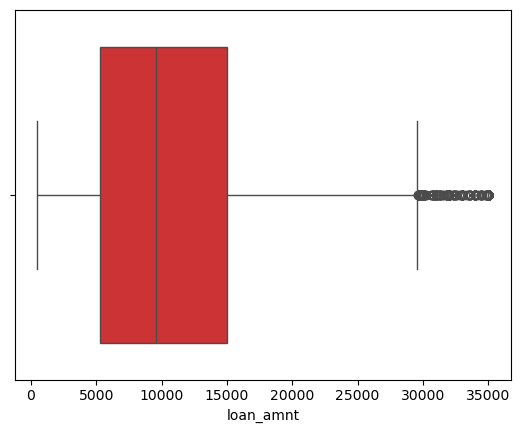

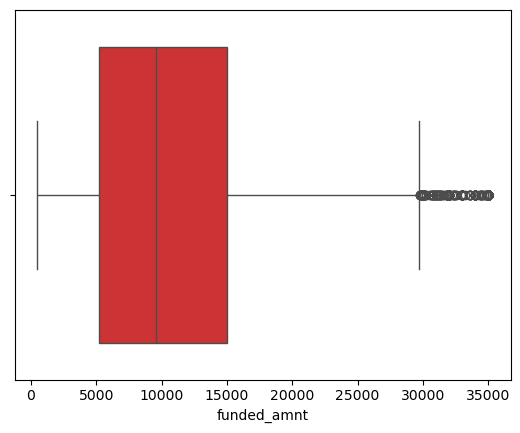

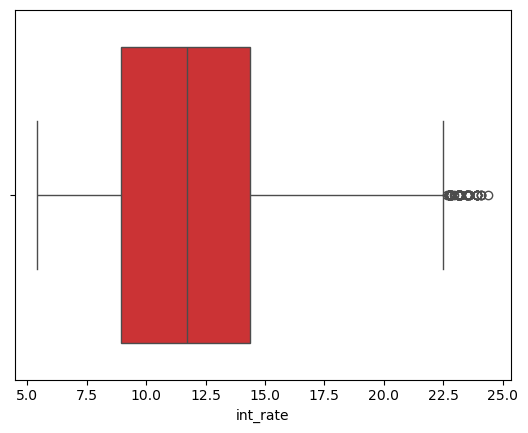

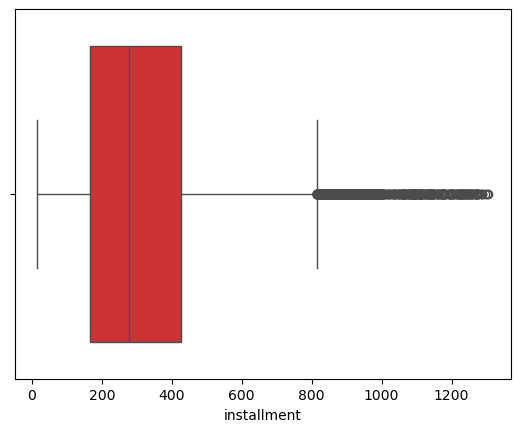

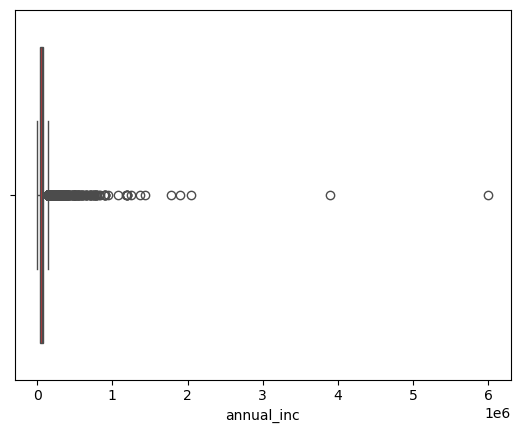

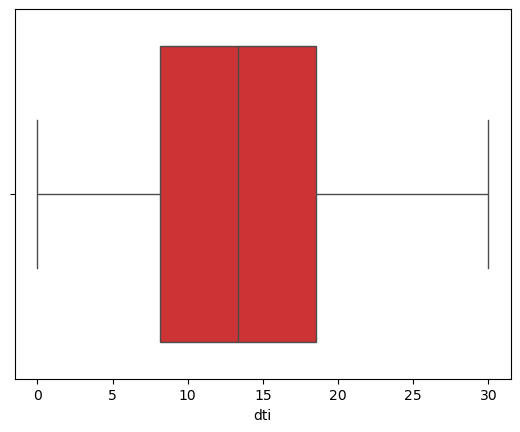

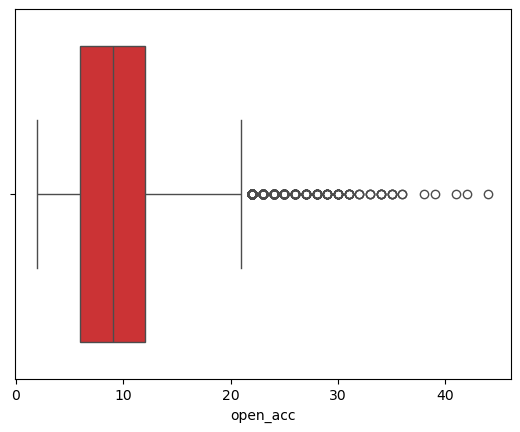

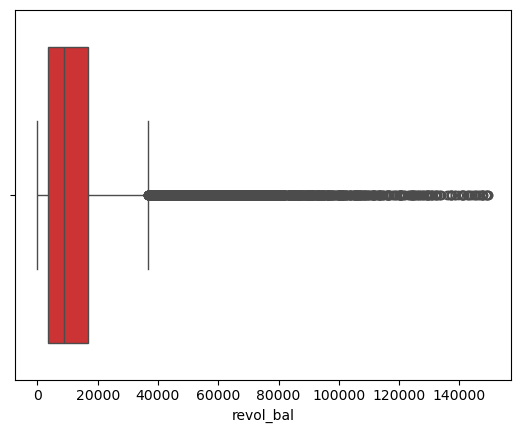

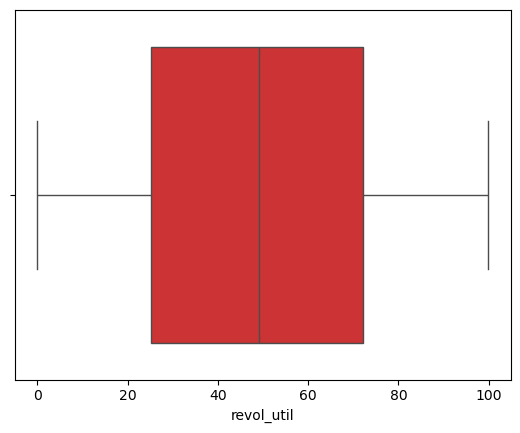

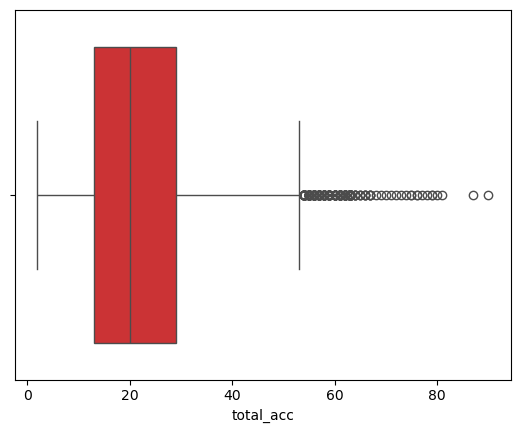

In [76]:
for col in num_cols:
    sns.boxplot(x=df_loan_final[col], palette="Set1")
    plt.show()

#### Outlier Correction

In [77]:
# There are outliers in annual_inc.
df_loan_final.annual_inc.describe()

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [78]:
# The range of values in annual_inc is 4000-6000000 with mean value as 68777
Q1= np.percentile(df_loan_final.annual_inc,25)
Q3= np.percentile(df_loan_final.annual_inc,75)
IQR= Q3-Q1 
Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
Upper_Whisker

145000.0

In [79]:
# Check how many records are there where annual_inc > Upper_Whisker
df_loan_final[df_loan_final.annual_inc > Upper_Whisker].annual_inc.count()

1762

In [80]:
#Find Percentage of records above the upper whisker value
round(100*df_loan_final[df_loan_final.annual_inc > Upper_Whisker].annual_inc.count()/df_loan_final.annual_inc.count(),2)


4.57

In [81]:
#Only 4.57% of records are having outliers. Hence we can remove these records
df_loan_final = df_loan_final[df_loan_final.annual_inc < Upper_Whisker]

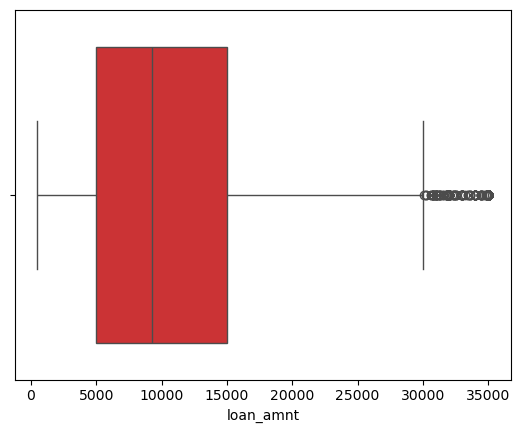

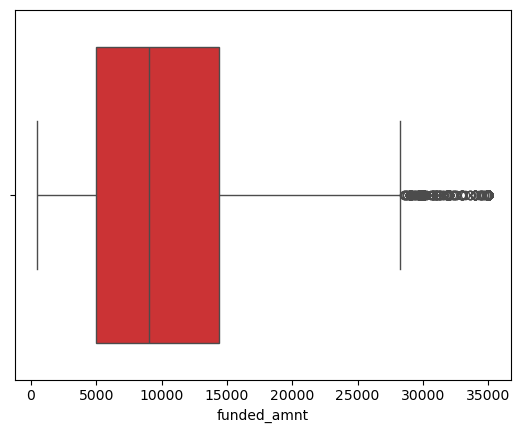

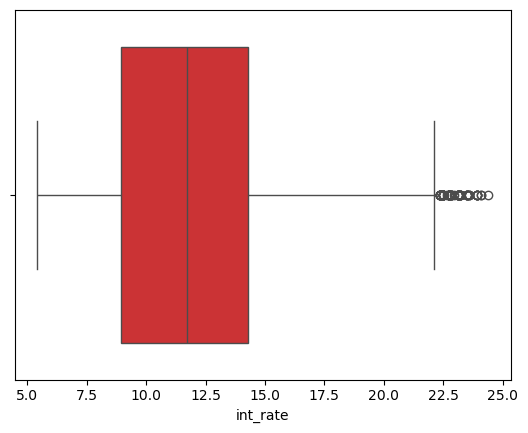

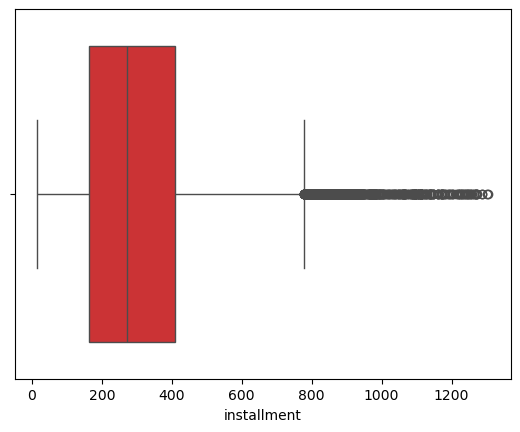

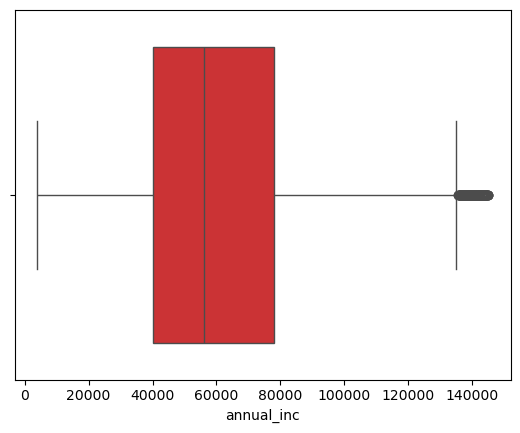

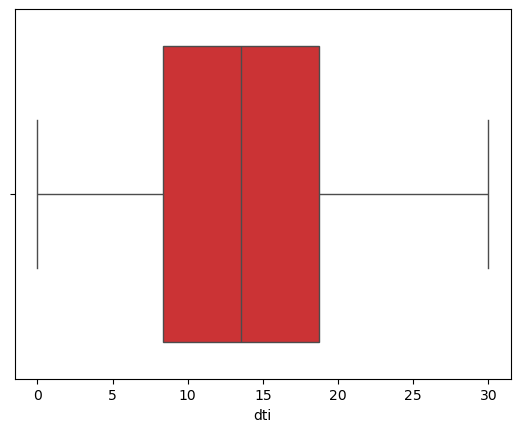

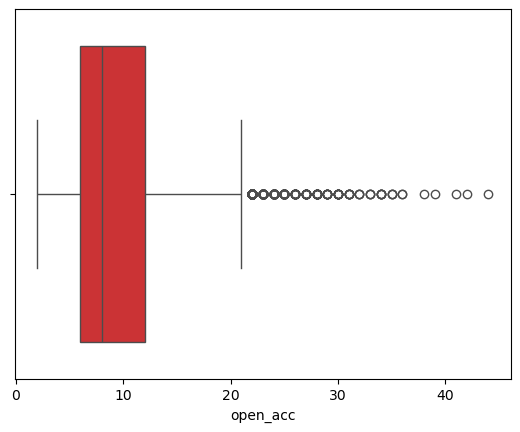

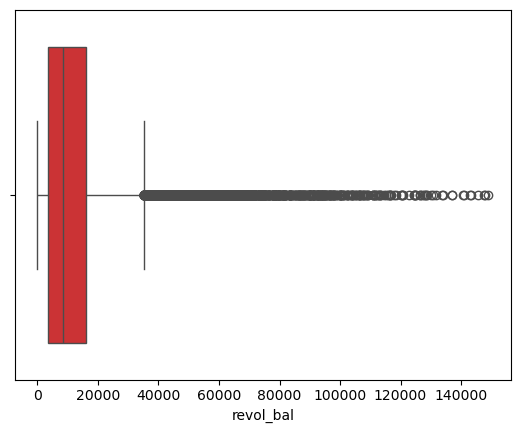

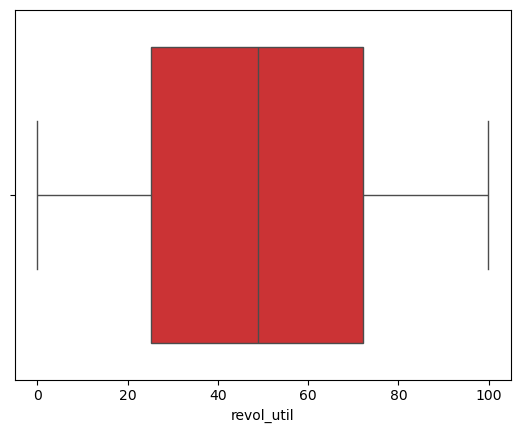

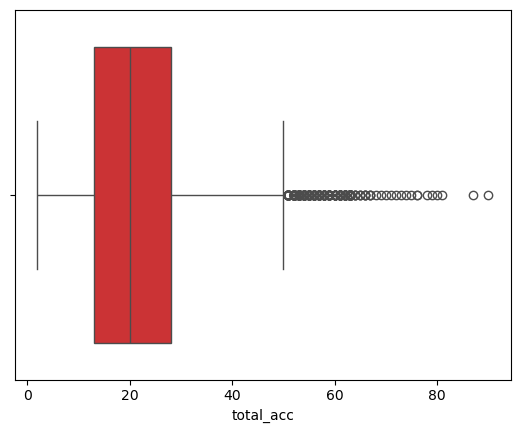

In [82]:
for col in num_cols:
    sns.boxplot(x=df_loan_final[col], palette="Set1")
    plt.show()

##### **Outlier Observation**
* **loan_amnt** - Outliers are present, but seems to be continuous. Hence No need to remove them
* **funded_amnt** - Outliers are present, but seems to be continuous. Hence No need to remove them
* **int_rate** - Outliers are present, but seems to be continuous. Hence No need to remove them
* **installment** - Outliers are present, but seems to be continuous. Hence No need to remove them
* **annual_inc** - Outliers present. Removed the outliers
* **dti** - No Outliers
* **open_acc** - Outliers are present, but seems to be minor. Hence No need to remove them
* **revol_util** - No Outliers
* **total_acc** - Outliers are present, but seems to be continuous. Hence No need to remove them

### Creation Derived Metrics for Numerical Columns

##### There are too many values in the numerical columns. Hence need to create different buckets for 
##### loan amount ,funded_amnt, interest rate ,installment, annual income , dti,revol_util and total_acc

In [83]:
df_loan_final.loan_amnt.describe()

count    36754.000000
mean     10696.825516
std       7060.951959
min        500.000000
25%       5000.000000
50%       9250.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [84]:
df_loan_final['loan_amnt_bucket'] = pd.cut(df_loan_final.loan_amnt, [-np.inf, 5000, 10000, 15000,np.inf],
                              labels=['0 - 5K', '5K - 10K', '10K - 15K', '15K - above'])
df_loan_final['loan_amnt_bucket']

0          0 - 5K
1          0 - 5K
2          0 - 5K
3        5K - 10K
5          0 - 5K
           ...   
39711      0 - 5K
39712      0 - 5K
39713    5K - 10K
39714      0 - 5K
39716    5K - 10K
Name: loan_amnt_bucket, Length: 36754, dtype: category
Categories (4, object): ['0 - 5K' < '5K - 10K' < '10K - 15K' < '15K - above']

In [85]:
df_loan_final['funded_amnt_bucket'] = pd.cut(df_loan_final.funded_amnt, [-np.inf, 5000, 10000, 15000,np.inf],
                              labels=['0 - 5K', '5K - 10K', '10K - 15K', '15K - above'])


In [86]:
df_loan_final.int_rate.describe()

count    36754.000000
mean        11.888697
std          3.668730
min          5.420000
25%          8.940000
50%         11.710000
75%         14.270000
max         24.400000
Name: int_rate, dtype: float64

In [87]:
df_loan_final['int_rate_bucket'] = pd.cut(df_loan_final.int_rate, [-np.inf, 9.0,11.0,13.0,15.0,np.inf],
                              labels=['Below 9%', '9%-11%','11%-13%','13%-15%','Above 15%'])
df_loan_final['int_rate_bucket'].value_counts()

int_rate_bucket
Below 9%     9445
Above 15%    7478
11%-13%      7295
13%-15%      6298
9%-11%       6238
Name: count, dtype: int64

In [88]:
df_loan_final.installment.describe()

count    36754.000000
mean       312.324623
std        199.618704
min         15.690000
25%        163.110000
50%        270.910000
75%        409.290000
max       1305.190000
Name: installment, dtype: float64

In [89]:
df_loan_final['installment_bucket'] = pd.cut(df_loan_final.installment, [-np.inf, 200, 400, 600,800,np.inf],
                              labels=['0 - 200', '200 - 400', '400 - 600','600 - 800', 'Above 800 '])

In [90]:
df_loan_final.annual_inc.describe()

count     36754.000000
mean      61079.142225
std       28040.679299
min        4000.000000
25%       40000.000000
50%       56000.000000
75%       78000.000000
max      144997.000000
Name: annual_inc, dtype: float64

In [91]:
df_loan_final['annual_inc_bucket'] = pd.cut(df_loan_final.annual_inc, [-np.inf, 40000, 50000, 60000, 70000, 80000,np.inf],
                              labels=['0 - 40k', '40k - 50k', '50k - 60k', '60k - 70k', '70k - 80k', 'Above 80k'])

In [92]:
df_loan_final.dti.describe()

count    36754.000000
mean        13.439892
std          6.660922
min          0.000000
25%          8.340000
50%         13.570000
75%         18.700000
max         29.990000
Name: dti, dtype: float64

In [93]:
df_loan_final['dti_bucket'] = pd.cut(df_loan_final.dti, [-np.inf, 8, 12, 16, 20,np.inf],
                              labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])

In [94]:
df_loan_final.revol_util.describe()

count    36754.000000
mean        48.595872
std         28.323762
min          0.000000
25%         25.200000
50%         48.900000
75%         72.100000
max         99.900000
Name: revol_util, dtype: float64

In [95]:
df_loan_final['revol_util_bucket'] = pd.cut(df_loan_final.revol_util, [-np.inf, 25, 50, 75, np.inf],
                              labels=['Below 25%', '25%-50%','50%-75%','Above 75%'])

In [96]:
df_loan_final.inq_last_6mths.value_counts()

inq_last_6mths
0    17904
1    10168
2     5354
3     2801
4      292
5      134
6       58
7       32
8       11
Name: count, dtype: int64

In [97]:
df_loan_final.total_acc.value_counts()

total_acc
15    1388
16    1380
14    1374
17    1361
20    1345
      ... 
79       1
87       1
74       1
78       1
80       1
Name: count, Length: 81, dtype: int64

In [98]:
df_loan_final.total_acc.describe()

count    36754.000000
mean        21.659928
std         11.240528
min          2.000000
25%         13.000000
50%         20.000000
75%         28.000000
max         90.000000
Name: total_acc, dtype: float64

In [99]:
df_loan_final['total_acc_bucket'] = pd.cut(df_loan_final.total_acc, [-np.inf, 13,18,23,28, np.inf],
                              labels=[ 'Below 13','13-18','18-23','23-28','Above 28'])

In [100]:
df_loan_final['total_acc_bucket'].value_counts()

total_acc_bucket
Below 13    9598
Above 28    8970
13-18       6842
18-23       6281
23-28       5063
Name: count, dtype: int64

In [101]:
df_loan_final.revol_bal.value_counts()

revol_bal
0        925
1         12
255       10
6          9
52         9
        ... 
97419      1
11599      1
9842       1
11079      1
66033      1
Name: count, Length: 20272, dtype: int64

In [102]:
df_loan_final.revol_bal.describe()

count     36754.000000
mean      12346.888311
std       13824.437974
min           0.000000
25%        3561.250000
50%        8511.500000
75%       16188.750000
max      149000.000000
Name: revol_bal, dtype: float64

In [103]:
df_loan_final['revol_bal_bucket'] = pd.cut(df_loan_final.revol_bal, [-np.inf, 3500,8500,13500,18500, np.inf],
                              labels=[ 'Very Low','Low','Medium','High','Very High'])

In [104]:
df_loan_final.open_acc.value_counts()

open_acc
7     3779
6     3721
8     3679
9     3455
5     3032
10    2940
11    2510
4     2254
12    2047
13    1727
3     1443
14    1332
15    1054
16     824
17     646
2      589
18     468
19     345
20     250
21     218
22     129
23      81
24      64
25      52
26      27
28      21
27      21
30      11
29       8
31       6
34       5
32       3
33       3
35       3
36       2
39       1
38       1
44       1
41       1
42       1
Name: count, dtype: int64

In [105]:
df_loan_final.open_acc.describe()

count    36754.000000
mean         9.171328
std          4.353137
min          2.000000
25%          6.000000
50%          8.000000
75%         12.000000
max         44.000000
Name: open_acc, dtype: float64

In [106]:
df_loan_final['open_acc_bucket'] = pd.cut(df_loan_final.open_acc, [-np.inf, 6,8,10,12, np.inf],
                              labels=[ 'Below 6','6 - 8','8 - 10','10 - 12','Above 12'])

In [107]:
df_loan_final.delinq_2yrs.value_counts()

delinq_2yrs
0     32798
1      3042
2       618
3       202
4        58
5        18
6        10
7         4
8         2
9         1
11        1
Name: count, dtype: int64

In [108]:
df_loan_final.inq_last_6mths.value_counts()

inq_last_6mths
0    17904
1    10168
2     5354
3     2801
4      292
5      134
6       58
7       32
8       11
Name: count, dtype: int64

In [109]:
df_loan_final.columns

Index(['loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'loan_status', 'purpose', 'addr_state', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'pub_rec_bankruptcies', 'issue_Month',
       'issue_Year', 'issue_Qtr', 'loan_amnt_bucket', 'funded_amnt_bucket',
       'int_rate_bucket', 'installment_bucket', 'annual_inc_bucket',
       'dti_bucket', 'revol_util_bucket', 'total_acc_bucket',
       'revol_bal_bucket', 'open_acc_bucket'],
      dtype='object')

In [110]:
df_loan_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36754 entries, 0 to 39716
Data columns (total 36 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   loan_amnt             36754 non-null  float64 
 1   funded_amnt           36754 non-null  float64 
 2   term                  36754 non-null  int64   
 3   int_rate              36754 non-null  float64 
 4   installment           36754 non-null  float64 
 5   grade                 36754 non-null  object  
 6   sub_grade             36754 non-null  object  
 7   emp_length            36754 non-null  int64   
 8   home_ownership        36754 non-null  object  
 9   annual_inc            36754 non-null  float64 
 10  verification_status   36754 non-null  object  
 11  loan_status           36754 non-null  object  
 12  purpose               36754 non-null  object  
 13  addr_state            36754 non-null  object  
 14  dti                   36754 non-null  float64 
 15  delinq_

In [111]:
with pd.option_context('display.max_columns', None):
    display(df_loan_final)

loan_amnt  funded_amnt  term  int_rate  installment grade sub_grade  \
0         5000.0       5000.0    36     10.65       162.87     B        B2   
1         2500.0       2500.0    60     15.27        59.83     C        C4   
2         2400.0       2400.0    36     15.96        84.33     C        C5   
3        10000.0      10000.0    36     13.49       339.31     C        C1   
5         5000.0       5000.0    36      7.90       156.46     A        A4   
...          ...          ...   ...       ...          ...   ...       ...   
39711     5000.0       5000.0    36      8.70       158.30     B        B1   
39712     2500.0       2500.0    36      8.07        78.42     A        A4   
39713     8500.0       8500.0    36     10.28       275.38     C        C1   
39714     5000.0       5000.0    36      8.07       156.84     A        A4   
39716     7500.0       7500.0    36     13.75       255.43     E        E2   

       emp_length home_ownership  annual_inc verification_status  loan_status  \
0              10           RENT     24000.0            Verified   Fully Paid   
1               0           RENT     30000.0            Verified  Charged Off   
2              10           RENT     12252.0        Not Verified   Fully Paid   
3              10           RENT     49200.0            Verified   Fully Paid   
5               3           RENT     36000.0            Verified   Fully Paid   
...           ...            ...         ...                 ...          ...   
39711           5       MORTGAGE     75000.0        Not Verified   Fully Paid   
39712           4       MORTGAGE    110000.0        Not Verified   Fully Paid   
39713           3           RENT     18000.0        Not Verified   Fully Paid   
39714           0       MORTGAGE    100000.0        Not Verified   Fully Paid   
39716           0            OWN     22000.0        Not Verified   Fully Paid   

                  purpose addr_state    dti  delinq_2yrs  inq_last_6mths  \
0             credit_card         AZ  27.65            0               1   
1                     car         GA   1.00            0               5   
2          small_business         IL   8.72            0               2   
3                   other         CA  20.00            0               1   
5                 wedding         AZ  11.20            0               3   
...                   ...        ...    ...          ...             ...   
39711         credit_card         CO  15.55            0               0   
39712    home_improvement         CO  11.33            0               0   
39713         credit_card         NC   6.40            1               1   
39714  debt_consolidation         MA   2.30            0               0   
39716  debt_consolidation         MA  14.29            1               0   

       open_acc  pub_rec  revol_bal  revol_util  total_acc  \
0             3        0      13648        83.7          9   
1             3        0       1687         9.4          4   
2             2        0       2956        98.5         10   
3            10        0       5598        21.0         37   
5             9        0       7963        28.3         12   
...         ...      ...        ...         ...        ...   
39711        10        0      66033        23.0         29   
39712        13        0       7274        13.1         40   
39713         6        0       8847        26.9          9   
39714        11        0       9698        19.4         20   
39716         7        0       4175        51.5          8   

       pub_rec_bankruptcies  issue_Month  issue_Year  issue_Qtr  \
0                       0.0           12        2011          4   
1                       0.0           12        2011          4   
2                       0.0           12        2011          4   
3                       0.0           12        2011          4   
5                       0.0           12        2011          4   
...                     ...          

In [112]:
df_loan_final = df_loan_final.reindex(sorted(df_loan_final.columns), axis=1)
with pd.option_context('display.max_columns', None):
    display(df_loan_final)

addr_state  annual_inc annual_inc_bucket  delinq_2yrs    dti dti_bucket  \
0             AZ     24000.0           0 - 40k            0  27.65  Very High   
1             GA     30000.0           0 - 40k            0   1.00   Very Low   
2             IL     12252.0           0 - 40k            0   8.72        Low   
3             CA     49200.0         40k - 50k            0  20.00       High   
5             AZ     36000.0           0 - 40k            0  11.20        Low   
...          ...         ...               ...          ...    ...        ...   
39711         CO     75000.0         70k - 80k            0  15.55     Medium   
39712         CO    110000.0         Above 80k            0  11.33        Low   
39713         NC     18000.0           0 - 40k            1   6.40   Very Low   
39714         MA    100000.0         Above 80k            0   2.30   Very Low   
39716         MA     22000.0           0 - 40k            1  14.29     Medium   

       emp_length  funded_amnt funded_amnt_bucket grade home_ownership  \
0              10       5000.0             0 - 5K     B           RENT   
1               0       2500.0             0 - 5K     C           RENT   
2              10       2400.0             0 - 5K     C           RENT   
3              10      10000.0           5K - 10K     C           RENT   
5               3       5000.0             0 - 5K     A           RENT   
...           ...          ...                ...   ...            ...   
39711           5       5000.0             0 - 5K     B       MORTGAGE   
39712           4       2500.0             0 - 5K     A       MORTGAGE   
39713           3       8500.0           5K - 10K     C           RENT   
39714           0       5000.0             0 - 5K     A       MORTGAGE   
39716           0       7500.0           5K - 10K     E            OWN   

       inq_last_6mths  installment installment_bucket  int_rate  \
0                   1       162.87            0 - 200     10.65   
1                   5        59.83            0 - 200     15.27   
2                   2        84.33            0 - 200     15.96   
3                   1       339.31          200 - 400     13.49   
5                   3       156.46            0 - 200      7.90   
...               ...          ...                ...       ...   
39711               0       158.30            0 - 200      8.70   
39712               0        78.42            0 - 200      8.07   
39713               1       275.38          200 - 400     10.28   
39714               0       156.84            0 - 200      8.07   
39716               0       255.43          200 - 400     13.75   

      int_rate_bucket  issue_Month  issue_Qtr  issue_Year  loan_amnt  \
0              9%-11%           12          4        2011     5000.0   
1           Above 15%           12          4        2011     2500.0   
2           Above 15%           12          4        2011     2400.0   
3             13%-15%           12          4        2011    10000.0   
5            Below 9%           12          4        2011     5000.0   
...               ...          ...        ...         ...        ...   
39711        Below 9%            7          3        2007     5000.0   
39712        Below 9%            7          3        2007     2500.0   
39713          9%-11%            7          3        2007     8500.0   
39714        Below 9%            7          3        2007     5000.0   
39716         13%-15%            6          2        2007     7500.0   

      loan_amnt_bucket  loan_status  open_acc open_acc_bucket  pub_rec  \
0               0 - 5K   Fully Paid         3         Below 6        0   
1               0 - 5K  Charged Off         3         Below 6        0   
2               0 - 5K   Fully Paid         2         Below 6        0   
3             5K - 10K   Fully Paid        10          8 - 10        0   
5               0 - 5K   Fully Paid         9          8 - 10        0   
...                ...        

### Data Categorization

The final cleaned up data can be divided into the following groups for visualization and analysis
##### 1. Categorical variables
    1. Ordered categorical data
        1. grade
        2. sub_grade
        3. term
        4. emp_length
        5. issue_Year
        6. issue_Month
        7. issue_Qtr
        8. pub_rec_bankruptcies
        9. pub_rec
        10. inq_last_6mths
        11. delinq_2yrs
     
    2. Unordered categorical data
        1. addr_state
        2. purpose
        3. home_ownership
        4. verification_status   

    
##### 2. Numerical variables
    1. Numerical Derived
        1. loan_amnt_bucket
        2. funded_amnt_bucket
        3. int_rate_bucket
        4. installment_bucket
        5. annual_inc_bucket
        6. dti_bucket
        7. open_acc_bucket
        8. revol_util_bucket
        9. revol_bal_bucket
        10. total_acc_bucket

    2. Numerical
        1. loan_amnt
        2. funded_amnt
        3. int_rate
        4. installment
        5. annual_inc
        6. dti
        7. open_acc
        8. revol_util
        9. revol_bal
        10. total_acc

In [113]:
catg_unordered_cols=['home_ownership','verification_status','addr_state','purpose']
catg_ordered_cols=['grade','sub_grade', 'term', 'emp_length', 'pub_rec', 'pub_rec_bankruptcies',
                    'issue_Year', 'issue_Month', 'issue_Qtr', 'delinq_2yrs', 'inq_last_6mths']
num_derived_cols=  ['loan_amnt_bucket', 'funded_amnt_bucket', 'int_rate_bucket','annual_inc_bucket', 'installment_bucket',  
                    'dti_bucket','revol_bal_bucket', 'revol_util_bucket','open_acc_bucket', 'total_acc_bucket']
num_cols=  ['loan_amnt', 'funded_amnt', 'int_rate','annual_inc', 'installment', 'dti', 
             'revol_bal', 'revol_util','open_acc', 'total_acc']
catg_cols=  ['addr_state', 'annual_inc_bucket', 'dti_bucket', 'funded_amnt_bucket', 'grade', 'home_ownership',
                'installment_bucket', 'int_rate_bucket', 'loan_amnt_bucket', 'loan_status', 'open_acc_bucket', 'purpose',
                'revol_bal_bucket', 'revol_util_bucket', 'sub_grade', 'total_acc_bucket', 'verification_status']

In [114]:
df_loan_final[catg_ordered_cols].head()

grade sub_grade  term  emp_length  pub_rec  pub_rec_bankruptcies  \
0     B        B2    36          10        0                   0.0   
1     C        C4    60           0        0                   0.0   
2     C        C5    36          10        0                   0.0   
3     C        C1    36          10        0                   0.0   
5     A        A4    36           3        0                   0.0   

   issue_Year  issue_Month  issue_Qtr  delinq_2yrs  inq_last_6mths  
0        2011           12          4            0               1  
1        2011           12          4            0               5  
2        2011           12          4            0               2  
3        2011           12          4            0               1  
5        2011           12          4            0               3

In [115]:
df_loan_final[catg_unordered_cols].head()

home_ownership verification_status addr_state         purpose
0           RENT            Verified         AZ     credit_card
1           RENT            Verified         GA             car
2           RENT        Not Verified         IL  small_business
3           RENT            Verified         CA           other
5           RENT            Verified         AZ         wedding

In [116]:
df_loan_final[num_cols].head()

loan_amnt  funded_amnt  int_rate  annual_inc  installment    dti  \
0     5000.0       5000.0     10.65     24000.0       162.87  27.65   
1     2500.0       2500.0     15.27     30000.0        59.83   1.00   
2     2400.0       2400.0     15.96     12252.0        84.33   8.72   
3    10000.0      10000.0     13.49     49200.0       339.31  20.00   
5     5000.0       5000.0      7.90     36000.0       156.46  11.20   

   revol_bal  revol_util  open_acc  total_acc  
0      13648        83.7         3          9  
1       1687         9.4         3          4  
2       2956        98.5         2         10  
3       5598        21.0        10         37  
5       7963        28.3         9         12

In [117]:
df_loan_final[num_cols].head()

loan_amnt  funded_amnt  int_rate  annual_inc  installment    dti  \
0     5000.0       5000.0     10.65     24000.0       162.87  27.65   
1     2500.0       2500.0     15.27     30000.0        59.83   1.00   
2     2400.0       2400.0     15.96     12252.0        84.33   8.72   
3    10000.0      10000.0     13.49     49200.0       339.31  20.00   
5     5000.0       5000.0      7.90     36000.0       156.46  11.20   

   revol_bal  revol_util  open_acc  total_acc  
0      13648        83.7         3          9  
1       1687         9.4         3          4  
2       2956        98.5         2         10  
3       5598        21.0        10         37  
5       7963        28.3         9         12

<h3 style = "color : Blue">  Univariate Analysis </h3>


#### Analysis for loan status

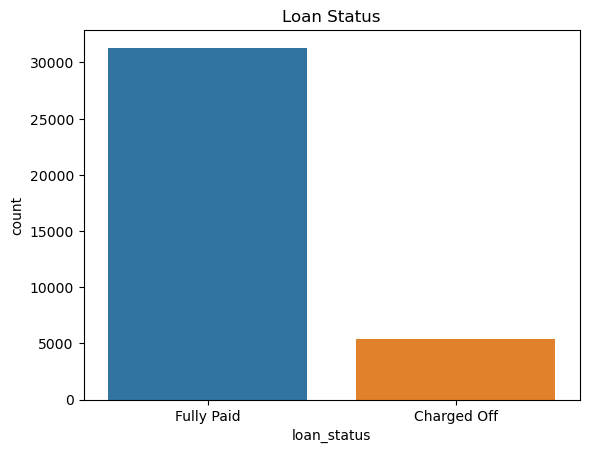

In [118]:
plt.title("Loan Status")
sns.countplot(x='loan_status', hue='loan_status', dodge=False,data=df_loan_final)
plt.show()

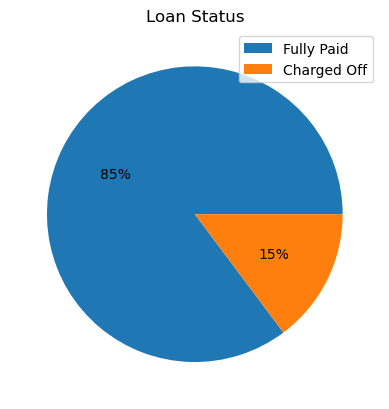

In [119]:
plt.title("Loan Status")
plt.pie(df_loan_final.loan_status.value_counts(), autopct='%1.0f%%')
plt.legend(df_loan_final.loan_status)
plt.show()

##### Observation 
######    Among the total loan records between fully paid and charged-off, around 15% of loan applicants are likely to be defaulters.

In [120]:
# For univariate analysis, consider only charged_off records
df_charged_off =  df_loan_final[df_loan_final.loan_status == "Charged Off"]


#### Categorical Ordered Data Visualization

In [121]:
catg_ordered_cols=['grade', 'term', 'emp_length', 'pub_rec', 'pub_rec_bankruptcies',
                    'issue_Year', 'issue_Month', 'issue_Qtr', 'delinq_2yrs', 'inq_last_6mths']

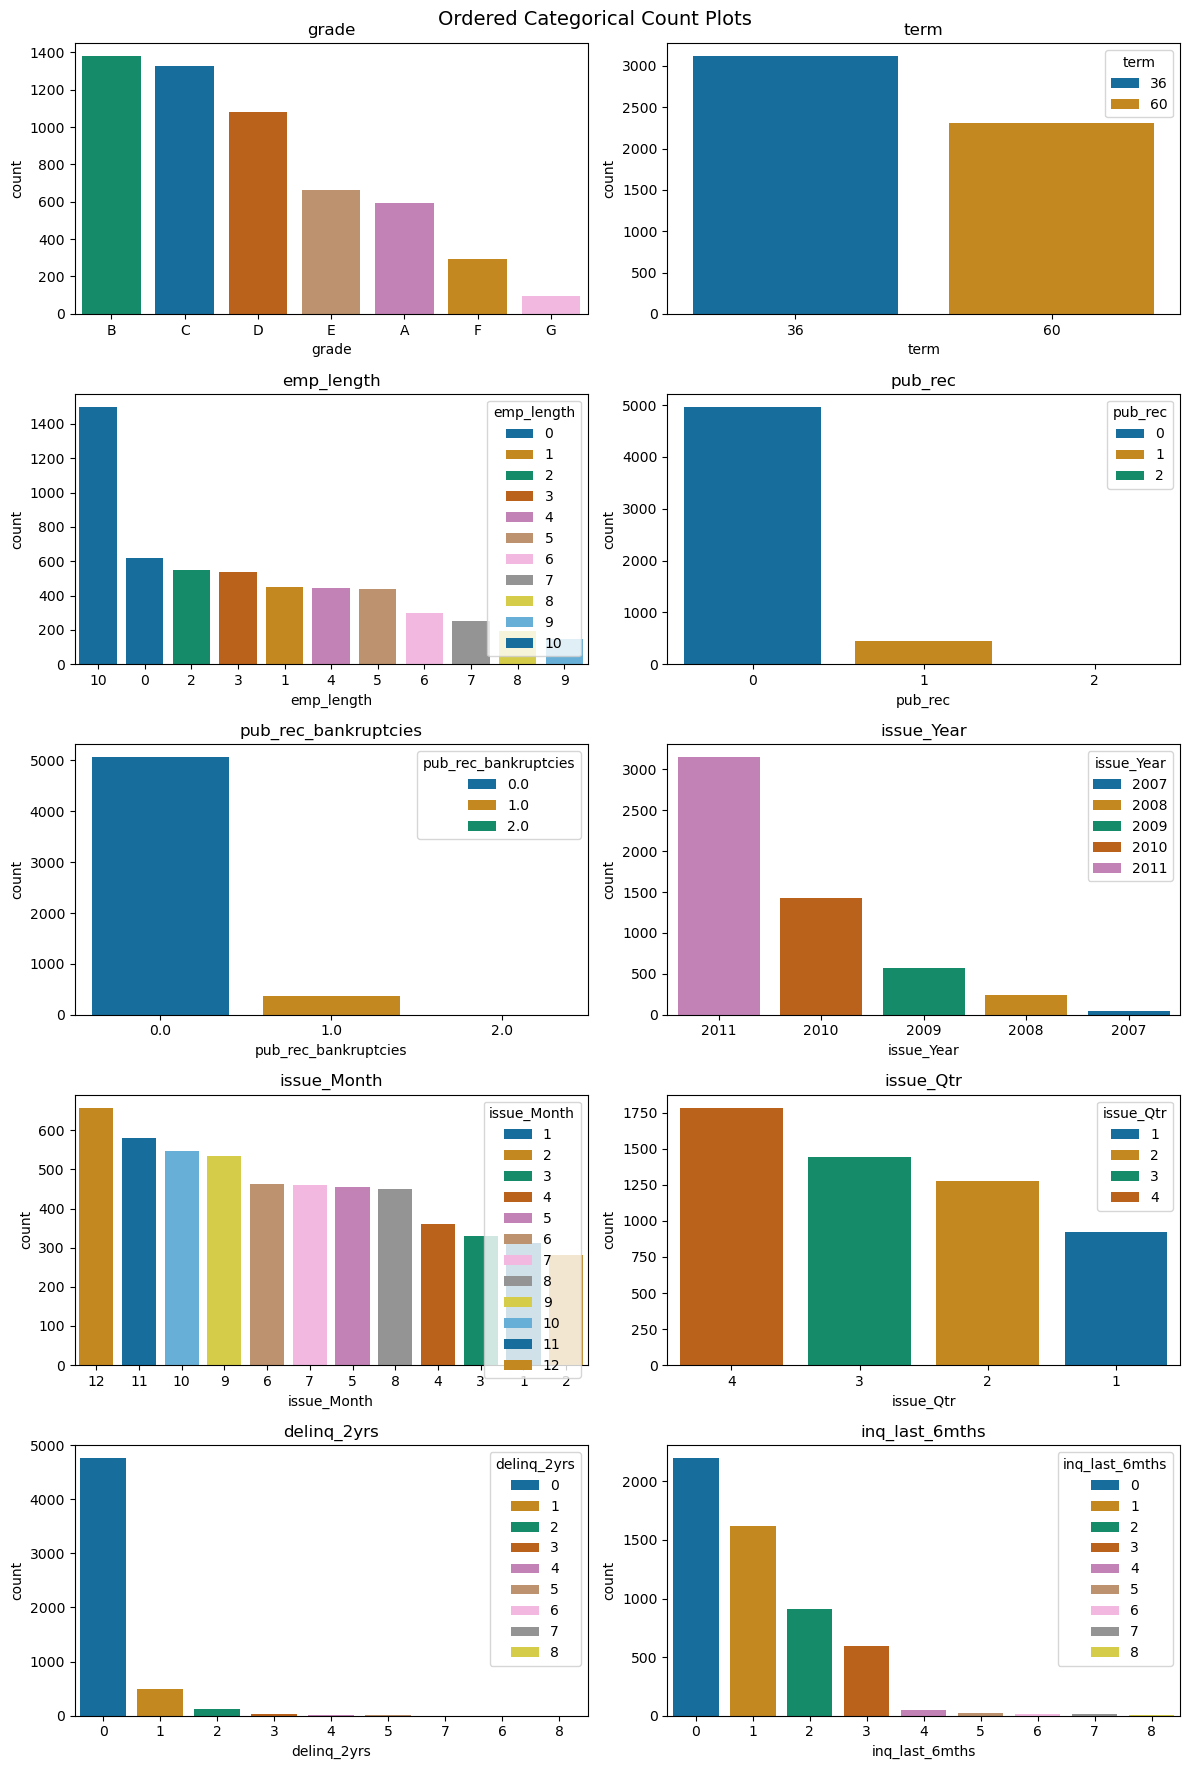

In [122]:
fig, axes = plt.subplots(5, 2, figsize=(12, 18))
fig.suptitle('Ordered Categorical Count Plots',fontsize=14)
for col, ax in zip(catg_ordered_cols, axes.flat):
    sns.countplot(data=df_charged_off,x=col,hue = col,order= df_charged_off[col].value_counts().index, palette="colorblind", ax=ax)
    ax.set_title(col, fontsize=12)

fig.tight_layout()
plt.show()

In [123]:
catg_ordered_cols=['grade','sub_grade', 'term', 'emp_length', 'pub_rec', 'pub_rec_bankruptcies',
                    'issue_Year', 'issue_Month', 'issue_Qtr', 'delinq_2yrs', 'inq_last_6mths']

##### Plot SubGrade as Part of Grade                

In [124]:
df_charged_off['sub_grade_f'] = pd.to_numeric(df_charged_off.sub_grade.apply(lambda x : x[-1]))

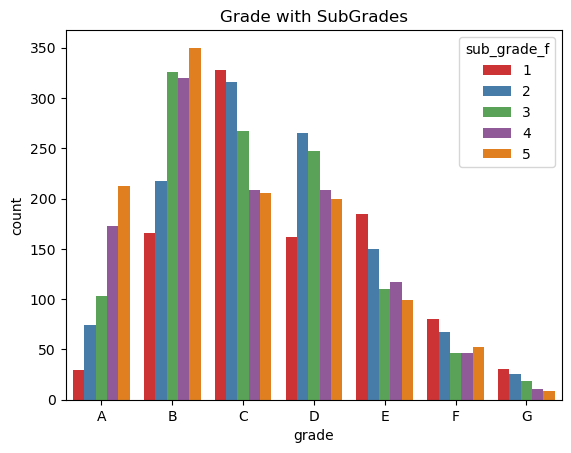

In [125]:
plt.title("Grade with SubGrades")
sns.countplot(x = 'grade', data = df_charged_off, hue = 'sub_grade_f', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'], palette="Set1")
plt.show()

##### Observation
        For Grade A and B most of the defaulters belongs to Subgrade 5
        For Grade D most of the defaulters belongs to Subgrade 2
        For Grade C, E and F most of the defaulters belongs to Subgrade 1

 #### Find Percentage Distribution of Term , emp_len and pub-rec using pie chart

In [126]:
fig = plt.figure(figsize=(15,6), dpi=1600)
#2 rows 2 columns

#first row, first column
ax1 = plt.subplot2grid((1,3),(0,0))
plt.pie(df_charged_off.term.value_counts(),  autopct='%1.0f%%')
plt.title("Charged-Off Percentage as per Term",fontsize=12)
plt.legend(df_charged_off.term.value_counts().index)

#first row sec column
ax1 = plt.subplot2grid((1,3), (0, 1))
plt.pie(df_charged_off.emp_length.value_counts().sort_index(),  autopct='%1.0f%%')
plt.title("Charged-Off Percentage as per Emp_Length",fontsize=12)
labels =df_charged_off.emp_length.value_counts().sort_index().index
plt.legend(labels)

#first row third column
ax1 = plt.subplot2grid((1,3), (0, 2))
plt.pie(df_charged_off.pub_rec.value_counts().sort_index(),  autopct='%1.0f%%')
plt.title("Charged-Off Percentage as per pub_rec",fontsize=12)
labels =df_charged_off.pub_rec.value_counts().sort_index().index
plt.legend(labels)

plt.show()


##### Ordered Categorical Variables Observations

- `Grade` - B & C had the highest number of "Charged off" loan applicants, indicating that applicants with these credit grade faced challenges in repaying their loans.

- `Term` - Short-term loans with a duration of 36 months having more number of defaulters(57%). This suggests that a significant portion of applicants who experienced loan default chose shorter repayment terms.

- `Employment Length` - Applicants who had been employed for more than 10 years accounted for the highest number of "Charged off" loans(28%). This indicates that long-term employment history did not necessarily guarantee successful loan repayment.

- `Loan Year` - The year 2011 recorded the highest number of "Charged off" loan applications. This could be indicative of economic or financial recession during that year.

- `Loan Taken Month and Quarter` - '"Charged off" loans were predominantly taken during the 4th quarter, primarily in December. This peak in loan applications during the holiday season might suggest that financial pressures during the holidays contributed to loan defaults.

- `Derogatory Public Records` - There is a significant number of defaulters(92%) do not have any derogatory public record. Having no derogatory record doen't indicate a non-defaulter.

- ` Public Record Bankruptcie` - There is a significant number of defaulters do not have any bankruptcy record. Having no bank ruptcy record is not an indication of a non-defaulter.

- `Past-due incidences of delinquency` - There is a significant number of defaulters do not have any Past-due incidences of delinquency for 2 years. Having no delinquency record doen't indicate a non-defaulter.

- `number of inquiries in past 6 months` - There is a significant number of defaulters do not have  made any inquiries in past 6 months . Having not made any inquiry doen't indicate a non-defaulter.

  

#### Categorical UnOrdered Data Visualization

catg_unordered_cols=['addr_state','purpose','home_ownership','loan_status','verification_status']


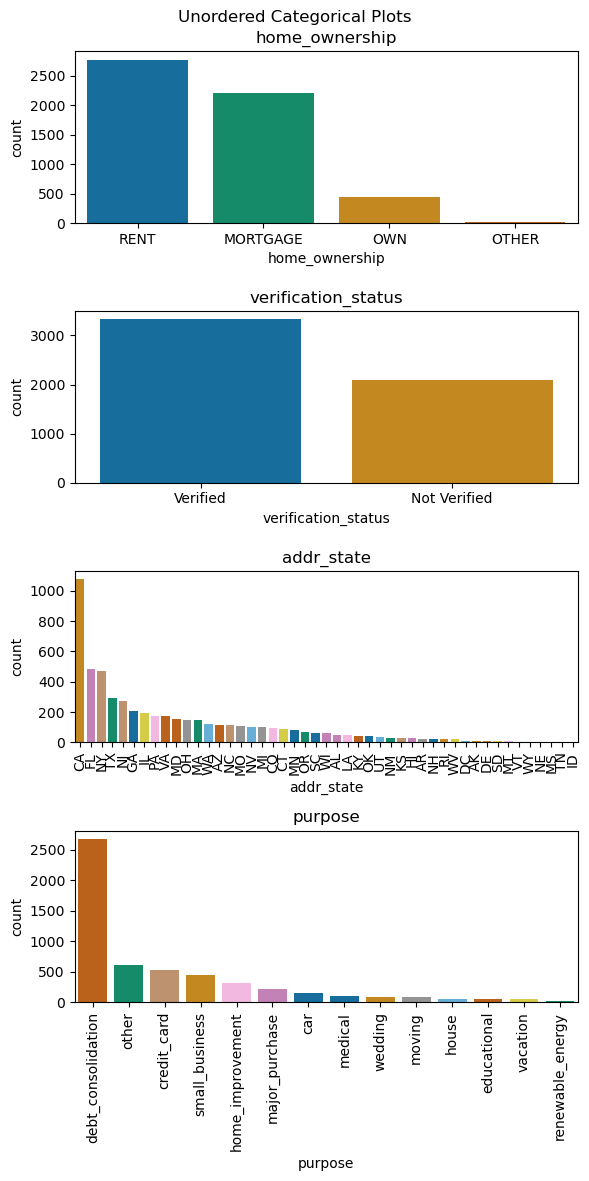

In [127]:
fig, axes = plt.subplots(4, 1, figsize=(6, 12))
fig.suptitle('Unordered Categorical Plots')
for col, ax in zip(catg_unordered_cols, axes.flat):
    sns.countplot(data=df_charged_off,x=col,hue = col,order= df_charged_off[col].value_counts().index, palette="colorblind", ax=ax)
    ax.set_title(col)
axes[2].tick_params(axis='x', rotation=90)
axes[3].tick_params(axis='x', rotation=90)
fig.tight_layout()
plt.show()

##### Unordered Categorical Data Observations

- `Address State` -  The highest number of "Charged off" loan applicants are from the state California. Hence more precautions need to be taken while assessing the loan applications.

- `Loan Purpose` - Debt consolidation was the primary loan purpose for most of the "Charged off" loan applicants. Hence needs to exercise more caution while approving loans for debt consolidation purposes.

- `Home Ownership` - The majority of "Charged off" loan applicants were living in rented houses. Hence needs to exercise more caution in assessing the financial condition of applicants living in rented houses.

- `Verifiation Staus` - For the majority of "Charged off" loan applicant's income were verified before issuing the loan. This indicates the verification of the income alone is not sufficient.  Hence the lending company should exercise more caution while analysing the financial stability of the applicants. 

#### Numerical Data Visualization
    

In [128]:
num_cols=  ['loan_amnt', 'funded_amnt', 'int_rate','annual_inc', 'installment', 'dti', 
             'revol_bal', 'revol_util','open_acc', 'total_acc']

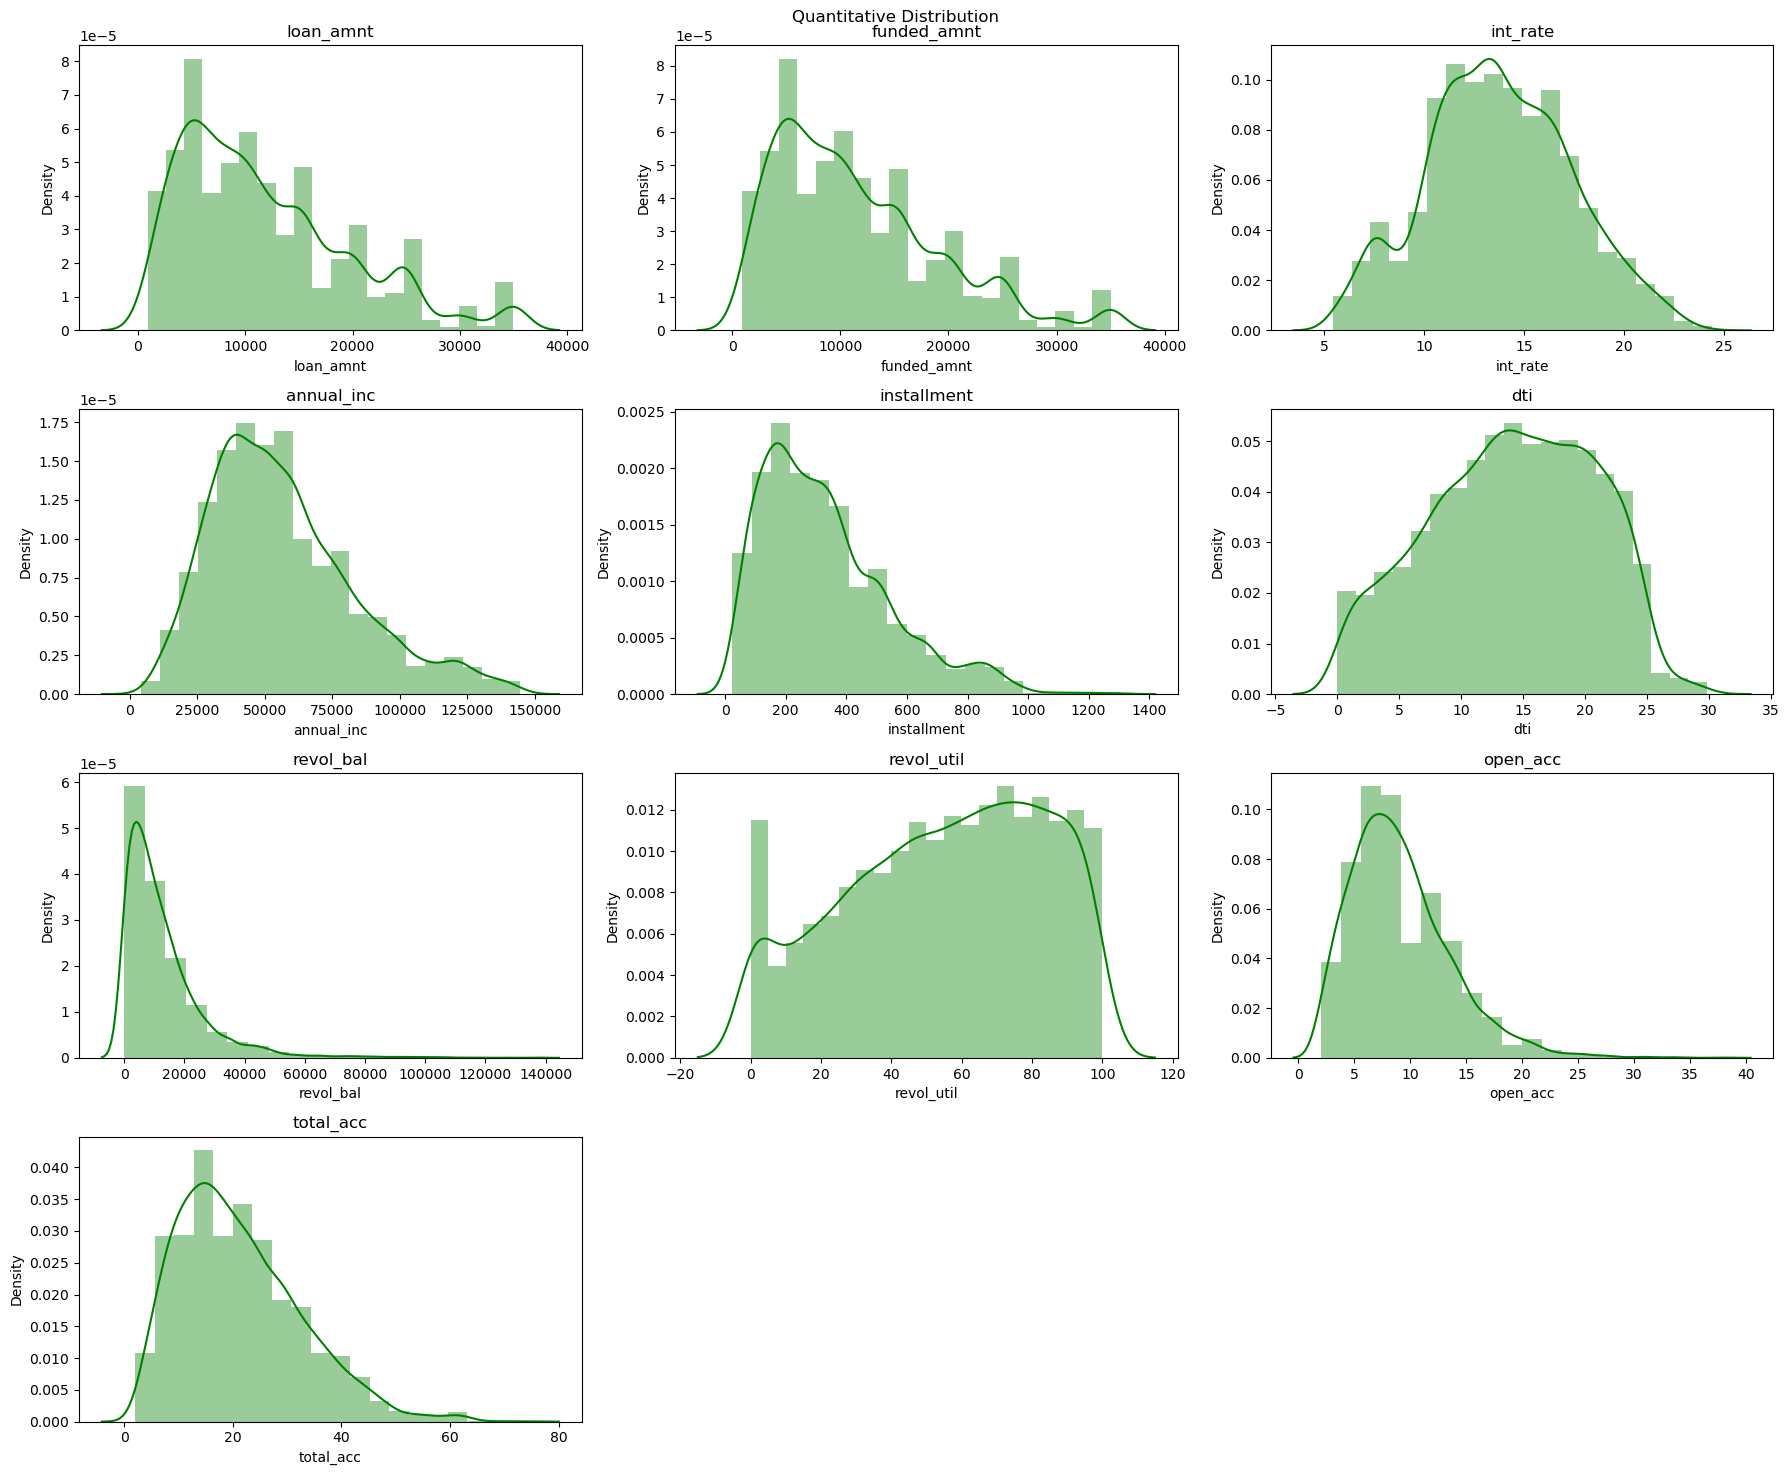

In [129]:
fig, axes = plt.subplots(4, 3, figsize=(18, 15))
fig.suptitle('Quantitative Distribution')
for col, ax in zip(num_cols, axes.flat):
    sns.distplot(df_charged_off[col], kde=True,bins=20, color="g", ax=ax)
    ax.set_title(col)
fig.delaxes(axes[3][1]) 
fig.delaxes(axes[3][2]) 
fig.tight_layout()
plt.show()

##### Numerical Variables Observations

- `Annual Income` -  Most of the defaulters are having an annual income of 25000 - 75000 USD. For higher income group, loan defaulting is less.

- `Loan Amount`  - When loan amount is high, charged-off density is low. This implies most of the loan defaulters are having relatively small loan amount

- `Interest Rate` - Loan Defaulting is more when interest rate increases.

- `dti` - The loan defaulting is more when debt to income is between 10 and 20

- `Installment Amount` - Charged-Off is more for lesser amount of installment. May be due to poor financial stability

- `Revolving Balance` - Charged off`  density is very high when revoving Balance is very low

- `Revolving Line Utilization`  - Charged off density is almost uniform across revolving line Utilization. 

- `Open Credit Lines` - Charged off  density is  high when number of open credit lines are in the range of 5-15

- `Total Credit Lines` - Charged off  density is  high when number of total credit lines are in the range of 15-25

#### Numerical Segmented Data Visualization 
    Numerical Derived
        1. loan_amnt_bucket
        2. funded_amnt_bucket
        3. int_rate_bucket
        4. installment_bucket
        5. annual_inc_bucket
        6. dti_bucket
        7. open_acc_bucket
        8. revol_util_bucket
        9. revol_bal_bucket
        10. total_acc_bucket

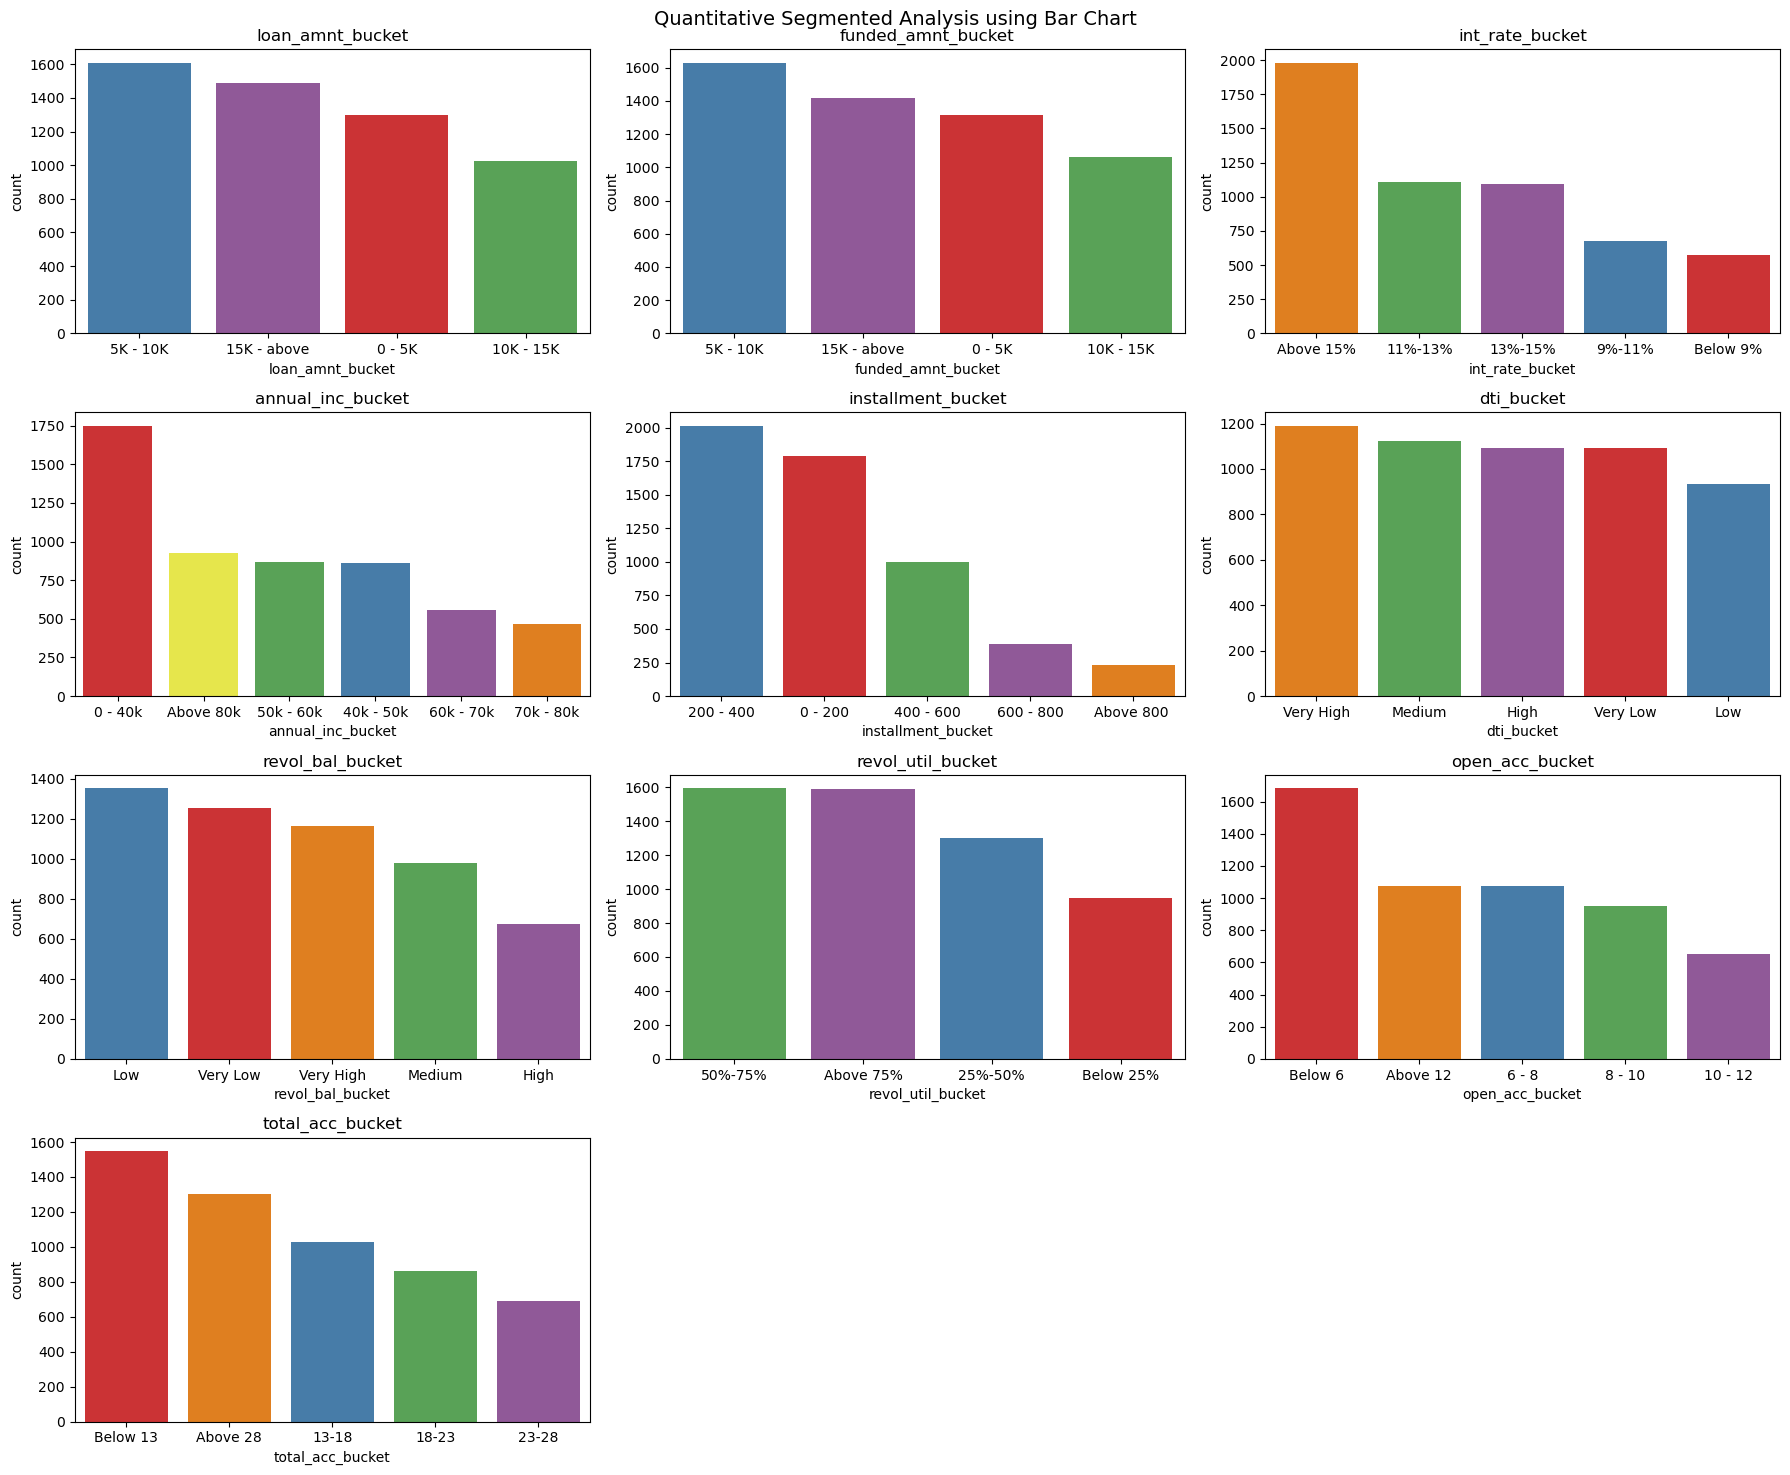

In [130]:
fig, axes = plt.subplots(4, 3, figsize=(18, 15))
fig.suptitle('Quantitative Segmented Analysis using Bar Chart',fontsize=14)
for col, ax in zip(num_derived_cols, axes.flat):
    sns.countplot(x=col, data = df_charged_off,hue = col,order= df_charged_off[col].value_counts().index, palette="Set1", ax=ax)
    ax.set_title(col,fontsize=12)
fig.delaxes(axes[3][1]) 
fig.delaxes(axes[3][2]) 
fig.tight_layout()
plt.show()


#### Numerical Segmented variables Observations

`Annual Income` - Most of the defaulters are having an annual income of less than 40000 USD. The lending company should exercise caution when lending to individuals with low annual salaries. They should implement rigorous income verification and assess repayment capacity more thoroughly for applicants in this income bracket.

`Loan Amount` - Most of the defaulters took a loan amount in the range of 5K-10K. Still a considerable defaulters are there for loan amount is above 15K. Hence extra care is needed when lending highesr loan amount.

`Interest Rate` - Loan Defaulting is more when interest rate is above 15%. When interest rate is less, defaulting is also less. Hence lending company may consider giving loans at a lower interest rate.

`Debt to Income Ratio (dti)` - The loan defaulting increase with increase in debt to income ratio. 

`Installment Amount` - Charged-Off is more for lesser amount of installment ie below 400 USD. May be due to poor financial stability

`Revolving Balance` - Charged of is very high when revoving Balance is very low. At the same time there are considerable number of loan defaulters when revolving Balance is high. No remarkable pattern can be observed here. Hence this parameter is not much of a deciding factor for Loan approval

`Revolving Line Utilization` - Loan defaulting is less when  revolving line Utilization is below 25%. 

`Open Credit Lines` - Charged off  density is  high when number of open credit lines are Below 6

`Total Credit Lines` - Charged off  density is  high when number of total credit lines are Below 13. Hence care should be taken when theres is not much of alternate credit lines are available for the applicant.


<h3 style = "color : Blue">  Bivariate Analysis </h3>

Following fields will be analysed as part of bivariate analysis against Loan Status (`loan_status`) column

#### 1. Categorical variables
    1. Ordered categorical data
        1. grade
        2. sub_grade
        3. term
        4. emp_length
        5. issue_Year
        6. issue_Month
        7. issue_Qtr
        8. pub_rec_bankruptcies
        9. pub_rec
        10. inq_last_6mths
        11. delinq_2yrs
     
    2. Unordered categorical data
        1. addr_state
        2. purpose
        3. home_ownership
        4. loan_status
        5. verification_status   

    
#### 2. Numerical variables
    1. Numerical Derived
        1. loan_amnt_bucket
        2. funded_amnt_bucket
        3. int_rate_bucket
        4. installment_bucket
        5. annual_inc_bucket
        6. dti_bucket
        7. open_acc_bucket
        8. revol_util_bucket
        9. revol_bal_bucket
        10. total_acc_bucket

    

In [131]:

catg_unordered_cols =  ['addr_state',  'home_ownership', 'loan_status', 'purpose',  'verification_status']
num_derived_cols=  ['annual_inc_bucket', 'int_rate_bucket','loan_amnt_bucket', 'funded_amnt_bucket', 'installment_bucket',  
                       'dti_bucket', 'revol_bal_bucket', 'revol_util_bucket', 'open_acc_bucket', 'total_acc_bucket']


#### Bivariate Analysis of Ordered Categorical Data
     Ordered categorical data
        1. grade
        2. sub_grade
        3. term
        4. emp_length
        5. issue_Year
        6. issue_Month
        7. issue_Qtr
        8. pub_rec_bankruptcies
        9. pub_rec
        10. inq_last_6mths
        11. delinq_2yrs
        Do Analysis on Loan Status Vs the above

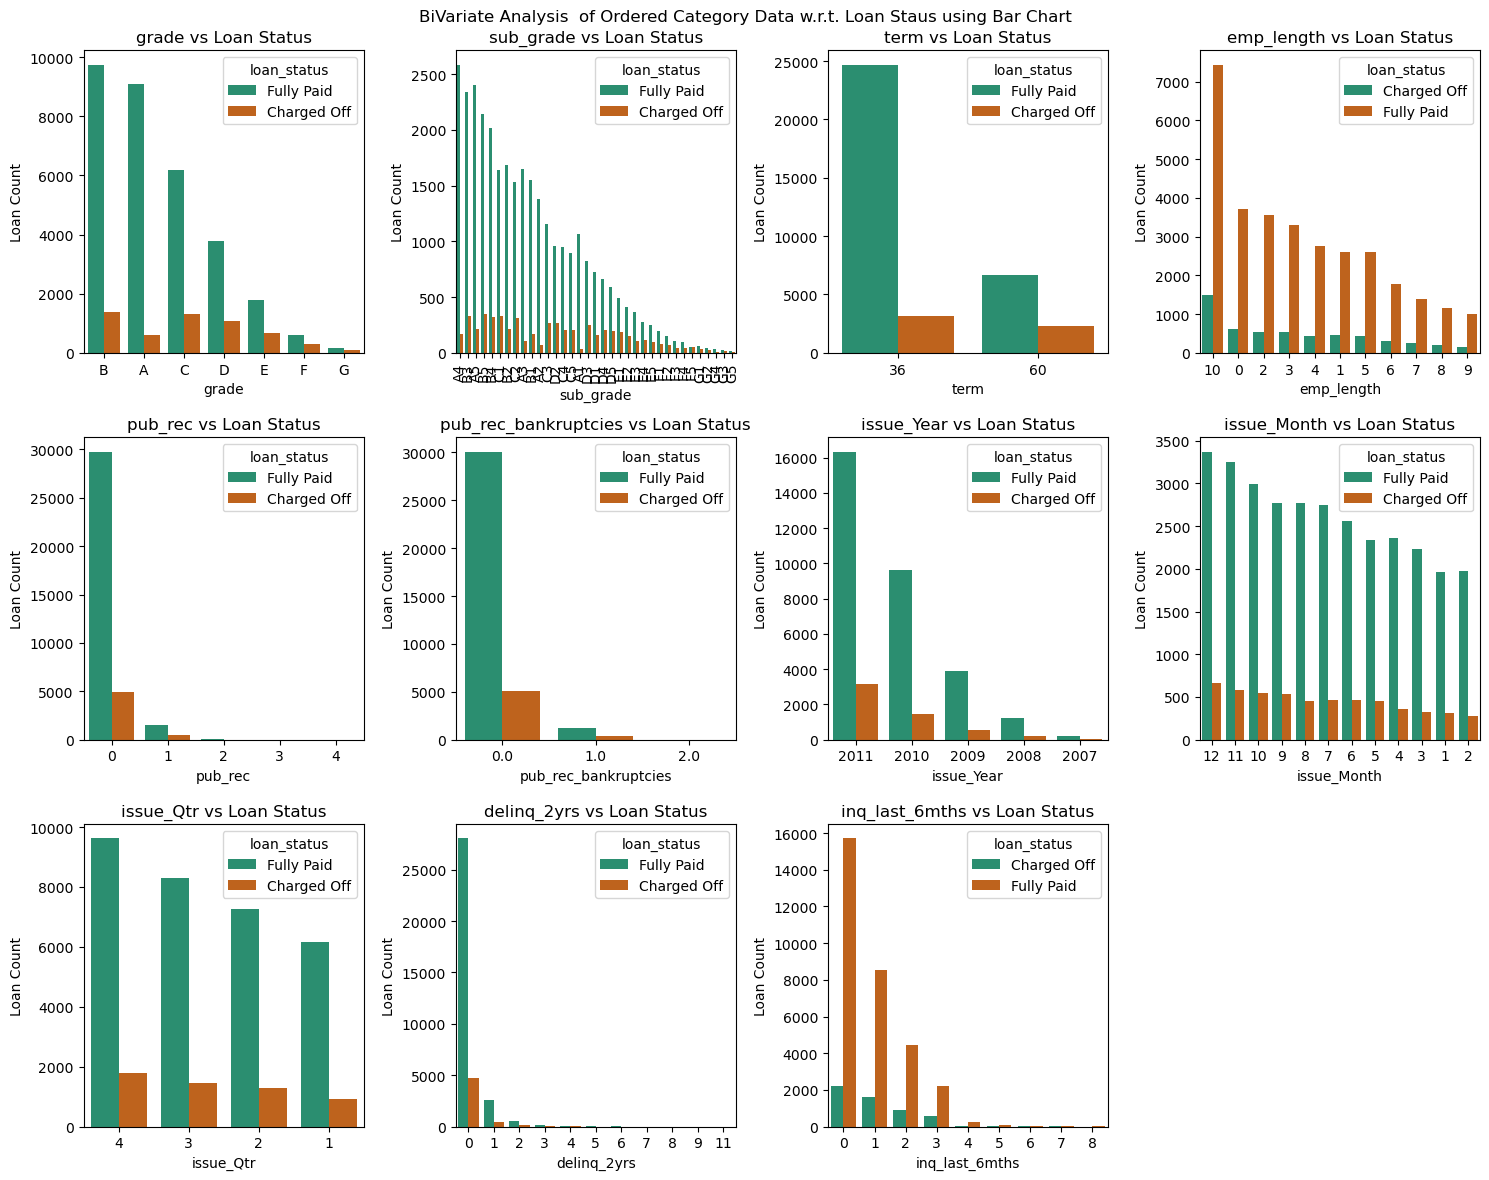

In [132]:
fig, axes = plt.subplots(3, 4, figsize=(15, 12))
fig.suptitle('BiVariate Analysis  of Ordered Category Data w.r.t. Loan Staus using Bar Chart')
for col, ax in zip(catg_ordered_cols, axes.flat):
    sns.countplot(x=col, data = df_loan_final,hue = 'loan_status',order= df_loan_final[col].value_counts().index, palette="Dark2", ax=ax)
    ax.set(title=f'{col} vs Loan Status', ylabel='Loan Count')

axes[0][1].tick_params(axis='x', rotation=90)
fig.delaxes(axes[2][3])
fig.tight_layout()
plt.show()



#### Ordered categorical data Observations
 - `Grade` - The loan applicants belonging to Grades B, C and D having the most number of defaulters
 - `Sub Grade` - Loan applicants belonging to Sub Grades B3, B5, and B4 are lmore likely to default
 - `Term` - Loan applicants applying loan for 60 months are more likely to default  than applying for 36 months
 - `Employment Length` - Most of the  loan applicants are having  10 or more years of experience. They also are the ones who are most likely to default
 - `Pub-rec / Pub-rec-bankruptcies` - Most of the loan applicants don't have any derogatory public records or bankruptcy records.
                                       The one having a public record are more likely to default.
 - `Issue Year` - The loan applicants have increased steadily from 2007 to 2011 showcasing positive trend in the upcoming years. 
                   The year 2011 have maximum number of loan applications and also the highest number of defaulters. 
                   Could be because of the economic recession experienced at the year
 - `Issue Month` - The month of December is the most preferred month of taking loans. This may be due to the holiday season.
 - `Issue Quarter` - Maximum number of loans are applied in the 4th Quarter. This is mainly due to the holiday season coming up
 - `delinq_2yrs` - Most of the loan applicants don't have any Past-due incidences of delinquency for 2 years.
                   The one having a delinquency are more likely to default.
 - `inq-last-6mths` - Most of the loan applicants don't have made any inquiries in past 6 months.
                      The one who have made inquiries are more likely to default.


#### Bivariate Analysis of Unordered Categorical Variables
     Unordered categorical data
        1. addr_state
        2. purpose
        3. home_ownership
        4. verification_status 

        Do Analysis on Loan Status Vs the above

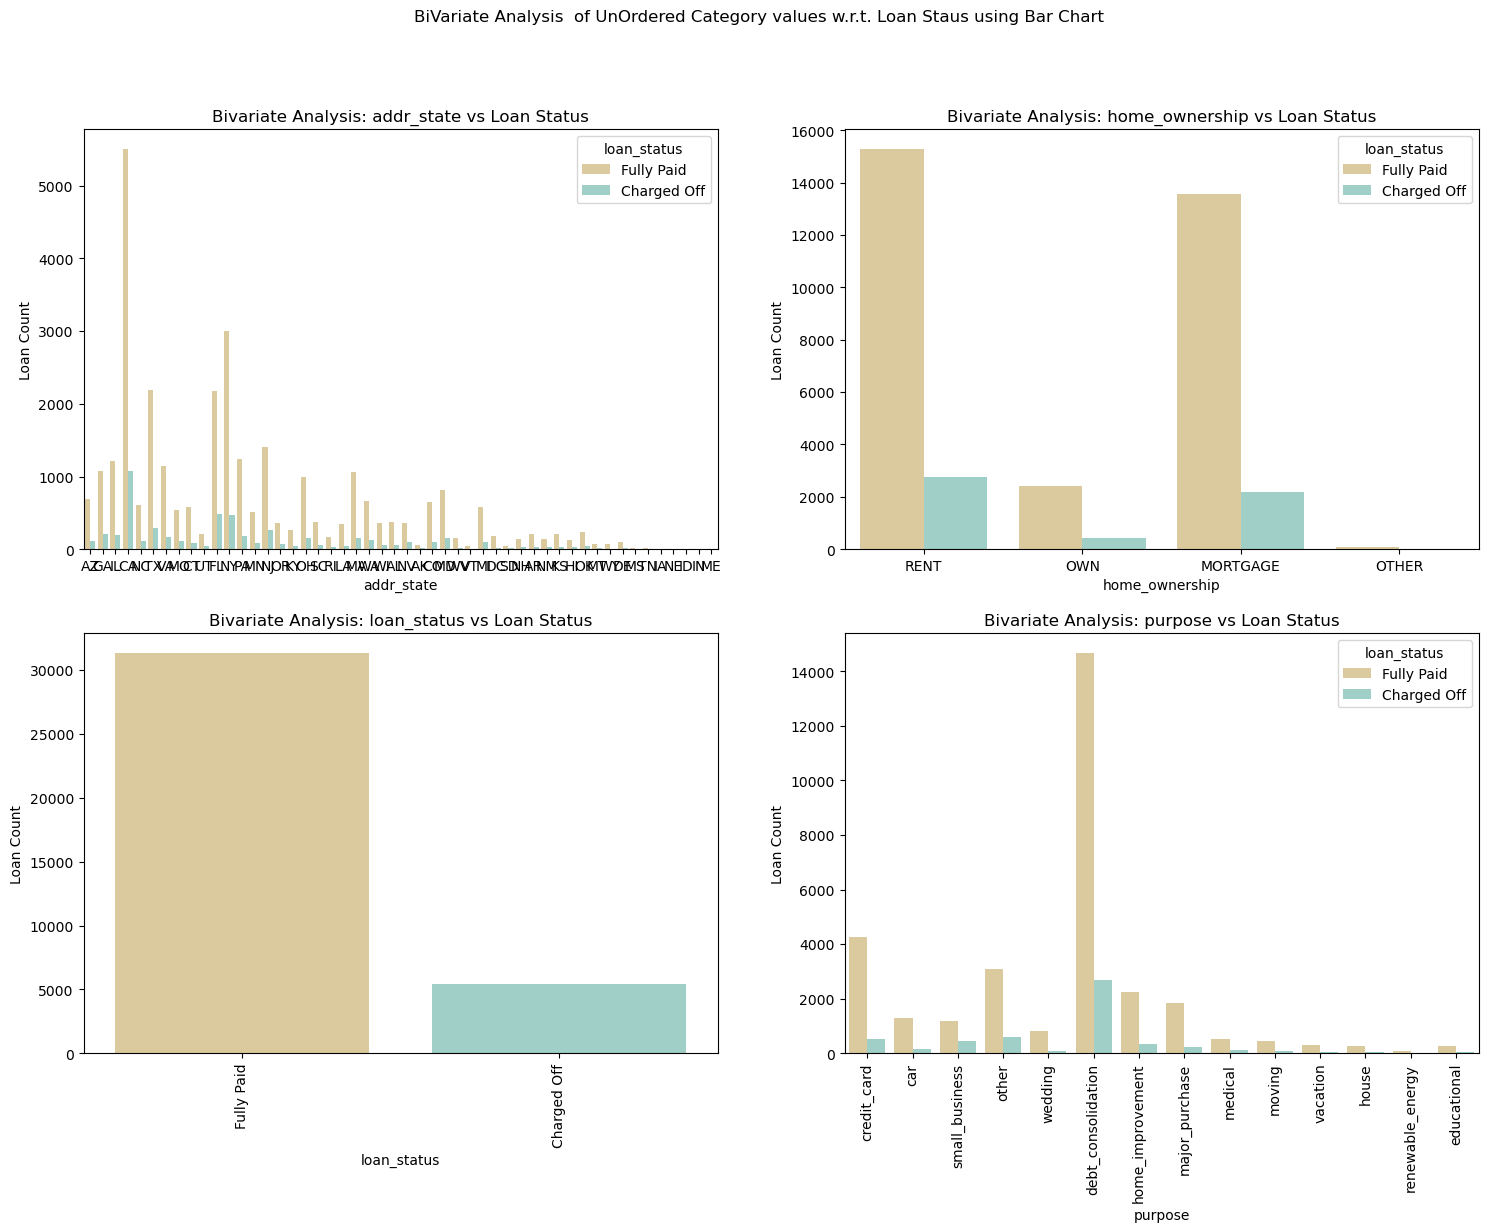

In [133]:
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('BiVariate Analysis  of UnOrdered Category values w.r.t. Loan Staus using Bar Chart')
for col, ax in zip(catg_unordered_cols, axes.flat):
    sns.countplot(x=col, data = df_loan_final,hue = 'loan_status', palette="BrBG", ax=ax)
    ax.set(title=f'Bivariate Analysis: {col} vs Loan Status', ylabel='Loan Count')

axes[1][0].tick_params(axis='x', rotation=90)
axes[1][1].tick_params(axis='x', rotation=90)
plt.show()

#### UnOrdered categorical data Observations
- `Address State` -  The States California, New York and Florida are having more number of Loan applicants and correspondingly more number of defaulters. Hence more precautions need to be taken while assessing the loan applications from these states

- `Loan Purpose` - Most of the loans are taken for the purpose of debt_consolidation and correspondingly the number of defaulters are also more  Hence needs to exercise more caution while approving loans for debt consolidation purposes.

- `Home Ownership` - The majority of loan applicants were living in rented houses and are having the highest count of defaulters. Hence needs to exercise more caution in assessing the financial condition of applicants living in rented houses.

- `Verification Status` - For the majority of loan applicant's income were verified before issuing the loan.  Still there are more number of applicants defaulted as compared to non verified applicants. This indicates the verification of the income alone is not sufficient.  Hence the lending company should exercise more caution while analysing the financial stability of the applicants. 

#### Bivariate Analysis of Numerical Derived Metrics
     Numerical Derived
        1. loan_amnt_bucket
        2. funded_amnt_bucket
        3. int_rate_bucket
        4. installment_bucket
        5. annual_inc_bucket
        6. dti_bucket
        7. open_acc_bucket
        8. revol_util_bucket
        9. revol_bal_bucket
        10. total_acc_bucket 

        Do Analysis on Loan Status Vs the above

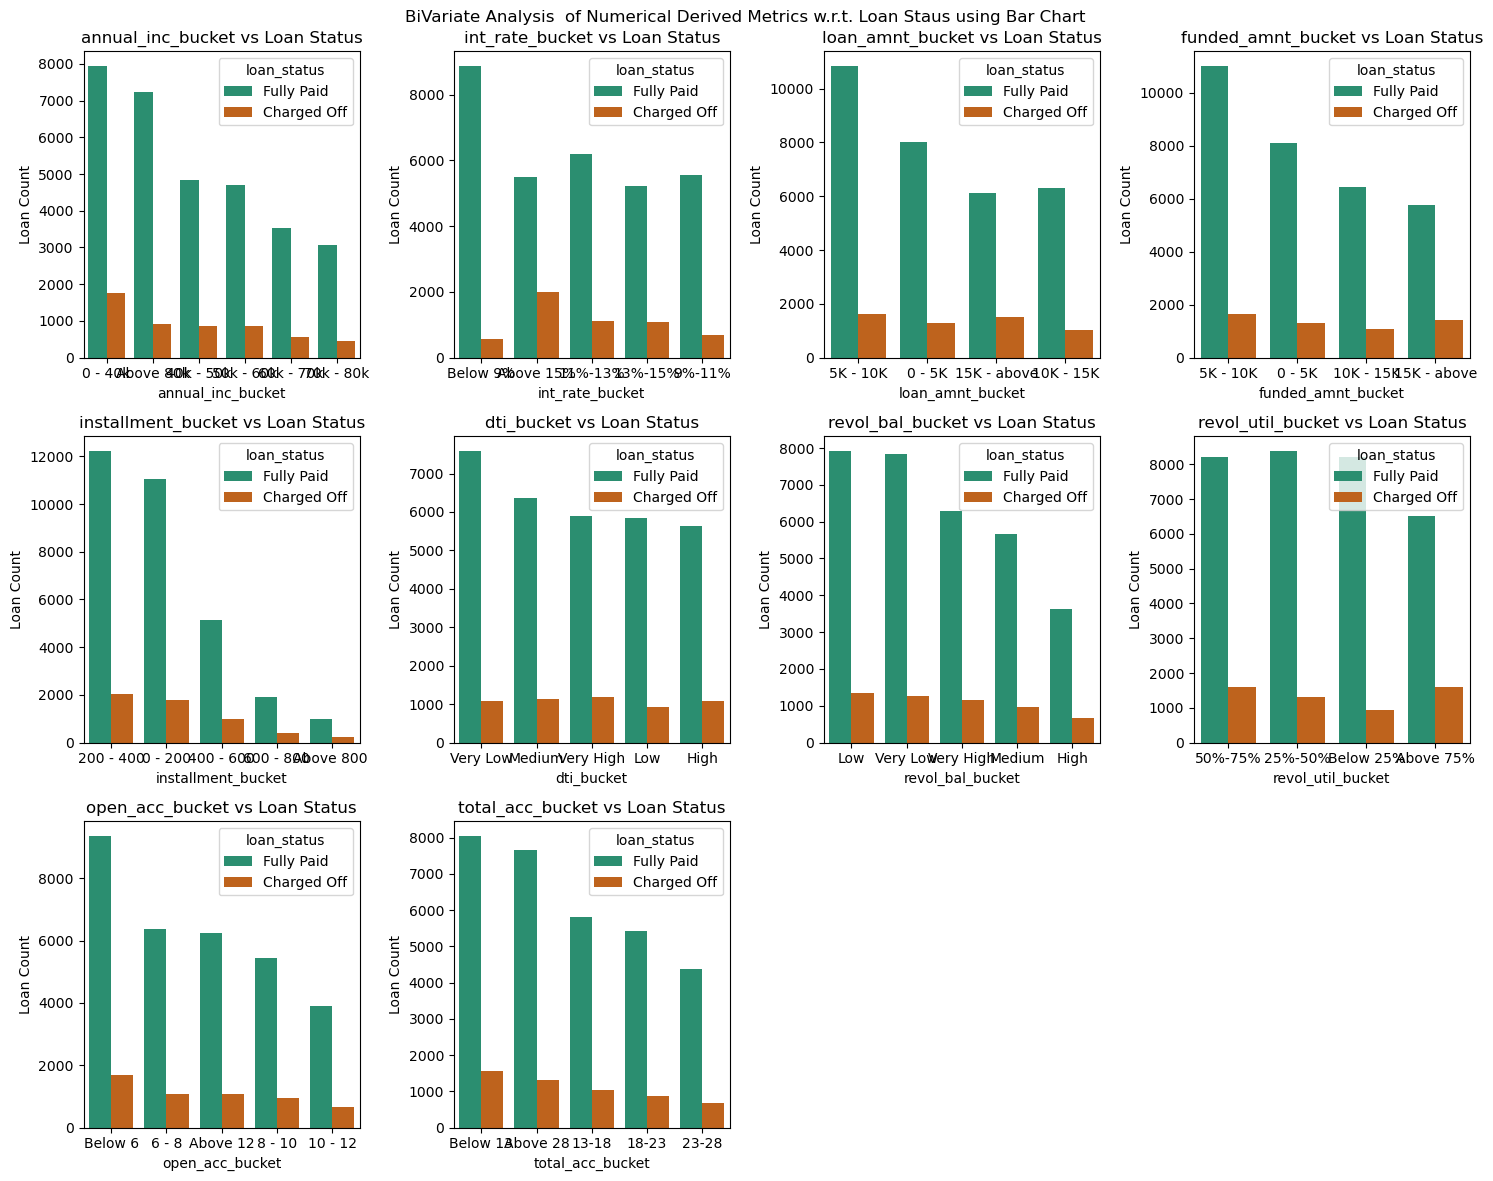

In [134]:
fig, axes = plt.subplots(3, 4, figsize=(15, 12))
fig.suptitle('BiVariate Analysis  of Numerical Derived Metrics w.r.t. Loan Staus using Bar Chart')
for col, ax in zip(num_derived_cols, axes.flat):
    sns.countplot(x=col, data = df_loan_final,hue = 'loan_status',order= df_loan_final[col].value_counts().index, palette="Dark2", ax=ax)
    ax.set(title=f'{col} vs Loan Status', ylabel='Loan Count')

fig.delaxes(axes[2][2])
fig.delaxes(axes[2][3])
fig.tight_layout()
plt.show()

#### Numerical variables - Bivariate analysis - Observations 

`Annual Income` - Most of the loan applicants are having an annual income of less than 40000 USD and correspondingly the charged-off count among them are also the highest. At the same time, considerable number of loan applicants are these from high income group of above 80K and there are some defaulters at this income level too. The proportionate analysis is needed to make any conclusion.

`Loan Amount` - Most of the loan applicants took a loan amount in the  low range of 5K-10K. Still considerable defaulters are there for  this range of loan. At the same time, considerable number of loan applicants took high amount of loan of above 15K and there are a significant count of defaulters are there for this high loan amount too. Hence  proportionate analysis is needed to make any conclusion.

`Interest Rate` - Most of the loans are disbursed with very low interest rate and correspondingly the number of defaulters are less compared to higher interest rate. It is also observed that the Loan Defaulting is more when interest rate is above 15%. Hence Lending Company should exercise extra care while issuing loans at higher interest rate.

`dti` - The count of defaulters are more or less same across different levels of debt to income ratio, even though more number of loans are issued for low dti value. This means having a higher value of dti increases the chances of defaulting.

`Installment Amount` - Majority of loans are having low installment amount , still Charged-Off is more for lesser amount of installment ie below 400 USD. May be due to poor financial stability

`Revolving Balance` - Loans are ususally issued for very Low to Medium revolving balance. Charged off is  high when revoving Balance is very low. At the same time there are considerable number of loan defaulters when revolving Balance is high. Hence  proportionate analysis is needed to make any conclusion.

`Revolving Line Utilization` - When revoving utilization is more, the applicant is likely to default

`Open Credit Lines` - More number of loans are issued for low levels (Below 6) of open credit lines. But no of defaulters are more at this low open credit lones. proportionate analysis is needed to make any conclusion.

`Total Credit Lines` - More loans are issued for a very low total credit lines as well as very high credit lines. The  defaulters in both the cases are also high as compared to other levels of total credit lines. Hence proportionate analysis is needed to make any conclusion.

<h3 style = "color : Blue"> BiVariate Analysis of Charged Off Proportion for Various Categories </h3>


#### Bivariate Analysis of Derived Buckets against Chargedoff_Proportion

In [135]:
#Bivariate Analysis of Derived Buckets against Chargedoff_Proportion -
df_bkt_vs_loan_lst = []
for col in num_derived_cols:
    df_bkt_vs_loan = df_loan_final.groupby([col, 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
    df_bkt_vs_loan['Total'] = df_bkt_vs_loan['Charged Off']+ df_bkt_vs_loan['Fully Paid']
    df_bkt_vs_loan['Chargedoff_Perc'] = round((100*df_bkt_vs_loan['Charged Off'] / df_bkt_vs_loan['Total']),2)
    df_bkt_vs_loan.sort_values('Chargedoff_Perc', ascending=False)
    df_bkt_vs_loan_lst.append(df_bkt_vs_loan)

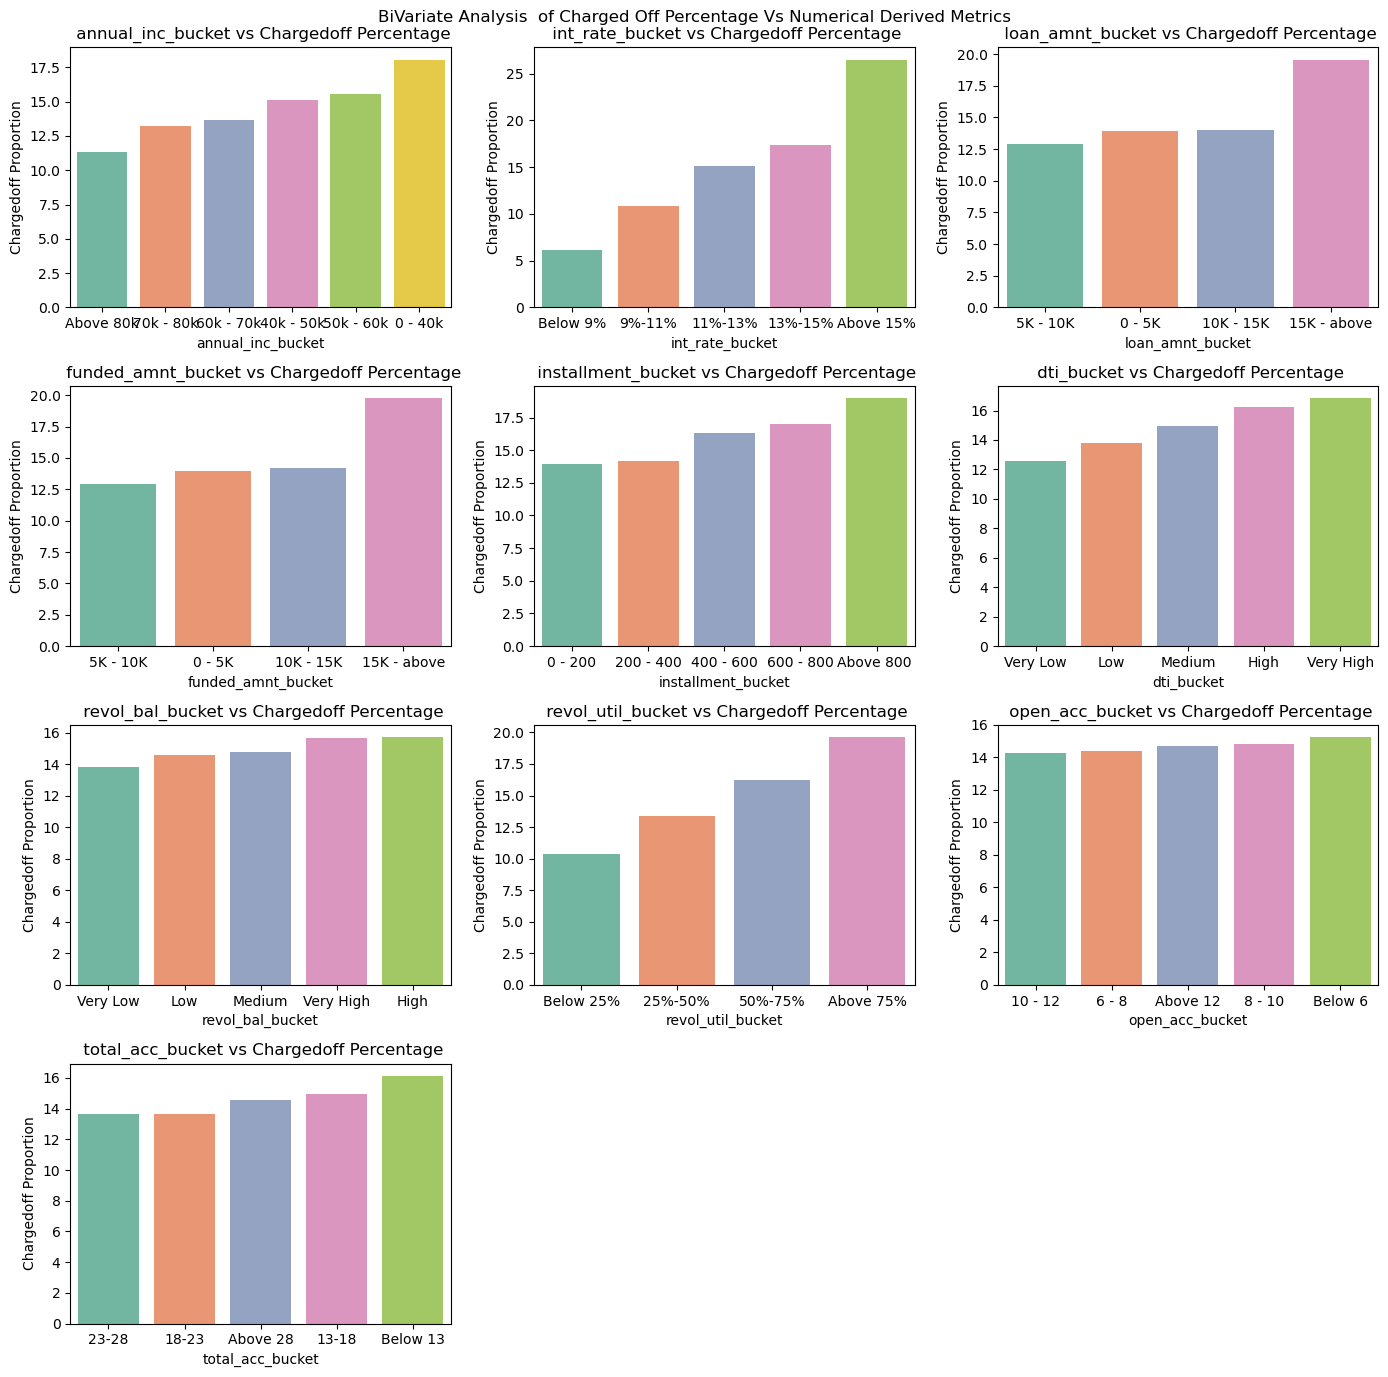

In [136]:
fig, axes = plt.subplots(4, 3, figsize=(14, 14))
fig.suptitle('BiVariate Analysis  of Charged Off Percentage Vs Numerical Derived Metrics')
for col, ax, i in zip(num_derived_cols, axes.flat, range(len(num_derived_cols))):
    df=df_bkt_vs_loan_lst[i]
    sns.barplot(ax=ax, data=df,x=col, y='Chargedoff_Perc',order=df.sort_values('Chargedoff_Perc')[col], palette="Set2")
    ax.set(title=f' {col} vs Chargedoff Percentage',xlabel=col, ylabel='Chargedoff Proportion')
    #ax.tick_params(axis='x', rotation=90)
fig.delaxes(axes[3][1])
fig.delaxes(axes[3][2])
fig.tight_layout()
plt.show()

#### Observations
 - `Annual Income` - When annual income increases, charged off percentage decreases.Hence the loan applicant whose annual income is Below 40k is more likely to default. Higher the annual income, the less chances of default.
                       
 - `interest rate` - Charged Off Percentage increases as the interest rate increases.For interest rate above 15%  has good chances of getting charged off as compared to other category interest rates.
 - `Loan Amount`   - More likely to default when Loan Amount is High (ie Above 15K)
 - `Funded Amount` - More likely to default when Funded Amount is High (ie Above 15K)
 - `Installment`   - More likely to default when installment  is High(ie.Above 800 ) 
 - `DTI`           - When DTI increases, charged off percentage increases and vice-versa. Hence Debt to Income Ration should be as low as  possible
 - `revolv-bal`    - When revol-bal is more there is a slightly more chances of charged-off
 - `revolv-util`   - When revolv-util percentage increases, chances of defaulting alos increases. When revolv-util is below 25%, there is less chances default and when it is above 75%, there is a high chances of default
 - `open-acc`      - There is no significant variation in default percentage for various categories of open-acc. Hence not a deciding factor 
 - `total-acc`     - There is no significant variation in default percentage for various categories of open-acc. Hence not a deciding factor 

#### Bivariate Analysis of Ordered Categories against Chargedoff_Proportion

In [137]:
#Bivariate Analysis of Ordered Categories against Chargedoff_Proportion -
catg_ordered_cols=['grade', 'term', 'emp_length','issue_Year', 'issue_Month', 'issue_Qtr',
                   'pub_rec', 'pub_rec_bankruptcies','delinq_2yrs','inq_last_6mths']
df_ord_vs_loan_lst = []
for col in catg_ordered_cols:
    df_ord_vs_loan = df_loan_final.groupby([col, 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
    df_ord_vs_loan['Total'] = df_ord_vs_loan['Charged Off']+ df_ord_vs_loan['Fully Paid']
    df_ord_vs_loan['Chargedoff_Perc'] = round((100*df_ord_vs_loan['Charged Off'] / df_ord_vs_loan['Total']),2)
    df_ord_vs_loan.sort_values('Chargedoff_Perc', ascending=False)
    df_ord_vs_loan_lst.append(df_ord_vs_loan)

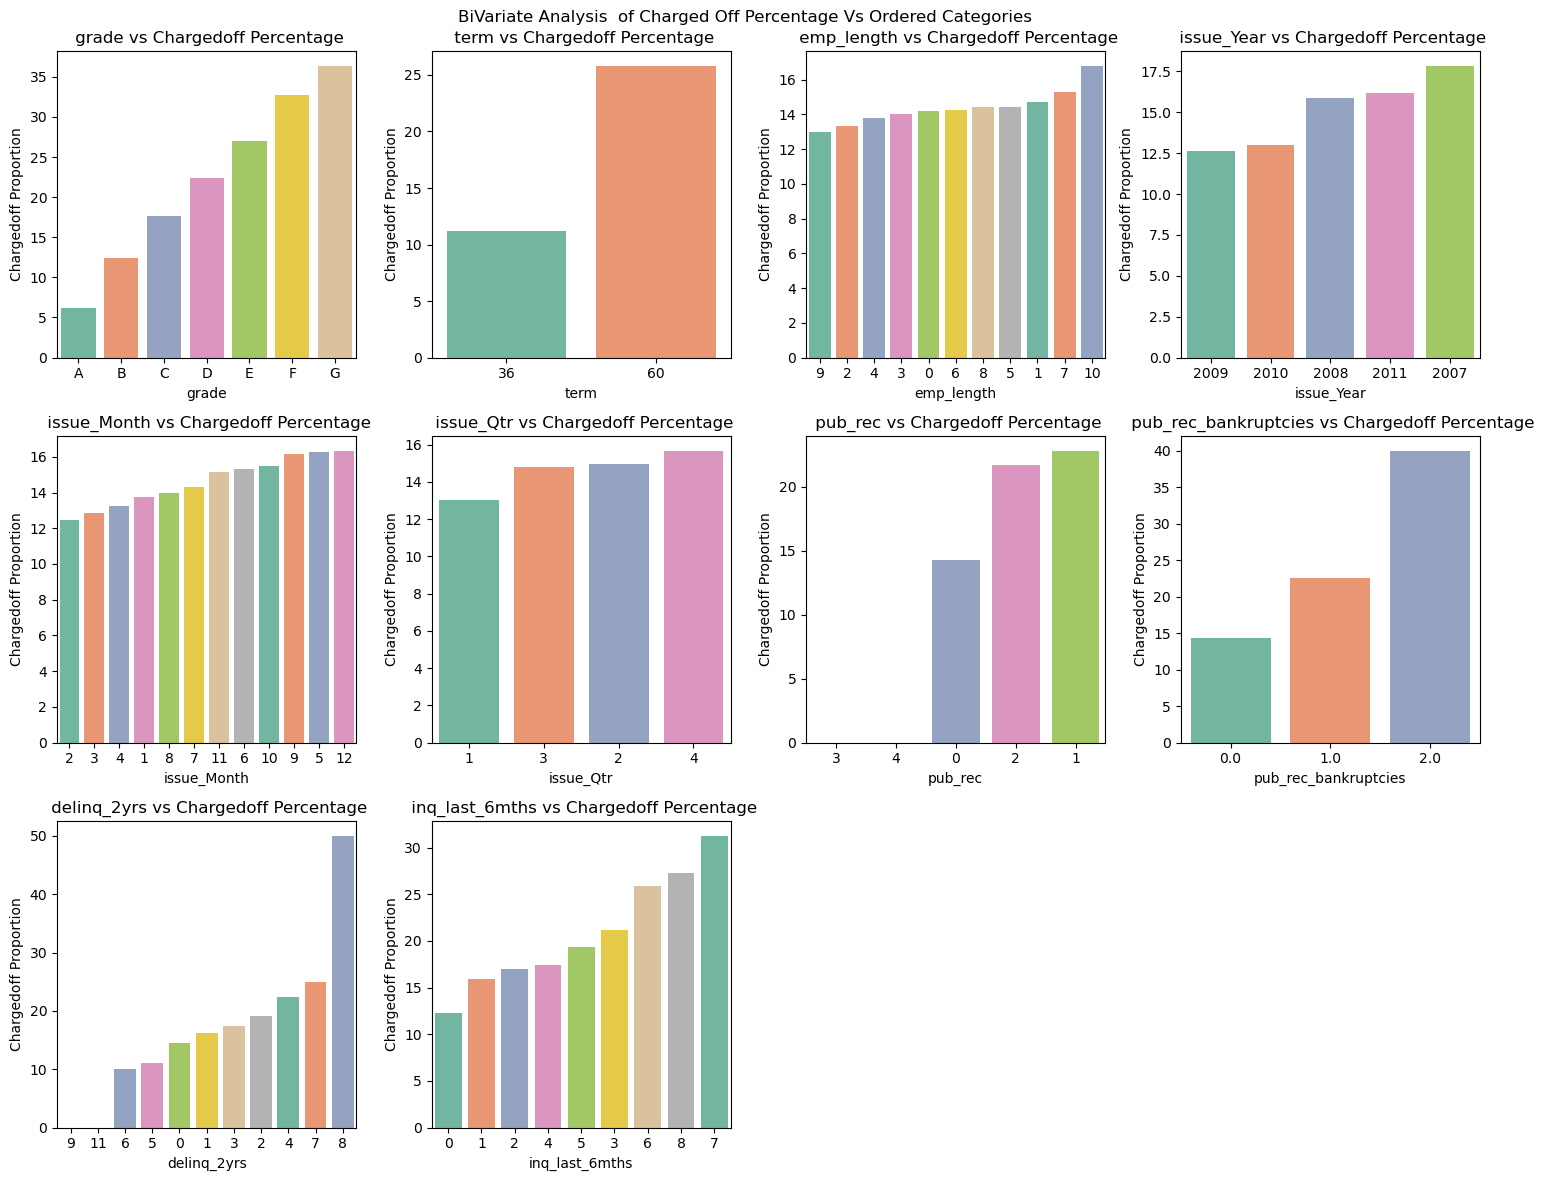

In [138]:
fig, axes = plt.subplots(3, 4, figsize=(15, 12))
fig.suptitle('BiVariate Analysis  of Charged Off Percentage Vs Ordered Categories')
for col, ax, i in zip(catg_ordered_cols, axes.flat, range(len(catg_ordered_cols))):
    df = df_ord_vs_loan_lst[i]
    sns.barplot(ax=ax, data=df,x=col, y='Chargedoff_Perc',order=df.sort_values('Chargedoff_Perc')[col], palette="Set2")
    ax.set(title=f' {col} vs Chargedoff Percentage',xlabel=col, ylabel='Chargedoff Proportion')
    #ax.tick_params(axis='x', rotation=90)
fig.delaxes(axes[2][3])
fig.delaxes(axes[2][2])
fig.tight_layout()
plt.show()

##### Observations
    Loan applicants applying loan for grade G are more likely to default than the one taking loan in any other category
    Loan applicants applying loan for 60 months are more likely to default than the one taking loan for 36 months
    Loan applicants applying loan having employment length 10+ years are more likely to default than the one having lesser years
    Charged-off percentage is high in 2007 and low in 2009
    Charged-off percentage is high in the month of May, Spetember and December and low in the month of February 
    Charged-off percentage is high in the last quarter of the year
    Loan applicants who are having high public record bankrupticies are more likely to default.
    Lower the Bankruptcies lower the risk.

#### Bivariate Analysis of UnOrdered Categories against Chargedoff_Proportion

In [139]:
#Bivariate Analysis of UnOrdered Categories against Chargedoff_Proportion -
catg_unordered_cols =  [  'home_ownership',  'verification_status', 'addr_state', 'purpose']
df_unord_vs_loan_lst = []
for col in catg_unordered_cols:
    df_unord_vs_loan = df_loan_final.groupby([col, 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
    df_unord_vs_loan['Total'] = df_unord_vs_loan['Charged Off']+ df_unord_vs_loan['Fully Paid']
    df_unord_vs_loan['Chargedoff_Perc'] = round((100*df_unord_vs_loan['Charged Off'] / df_unord_vs_loan['Total']),2)
    df_unord_vs_loan.sort_values('Chargedoff_Perc', ascending=False)
    df_unord_vs_loan_lst.append(df_unord_vs_loan)


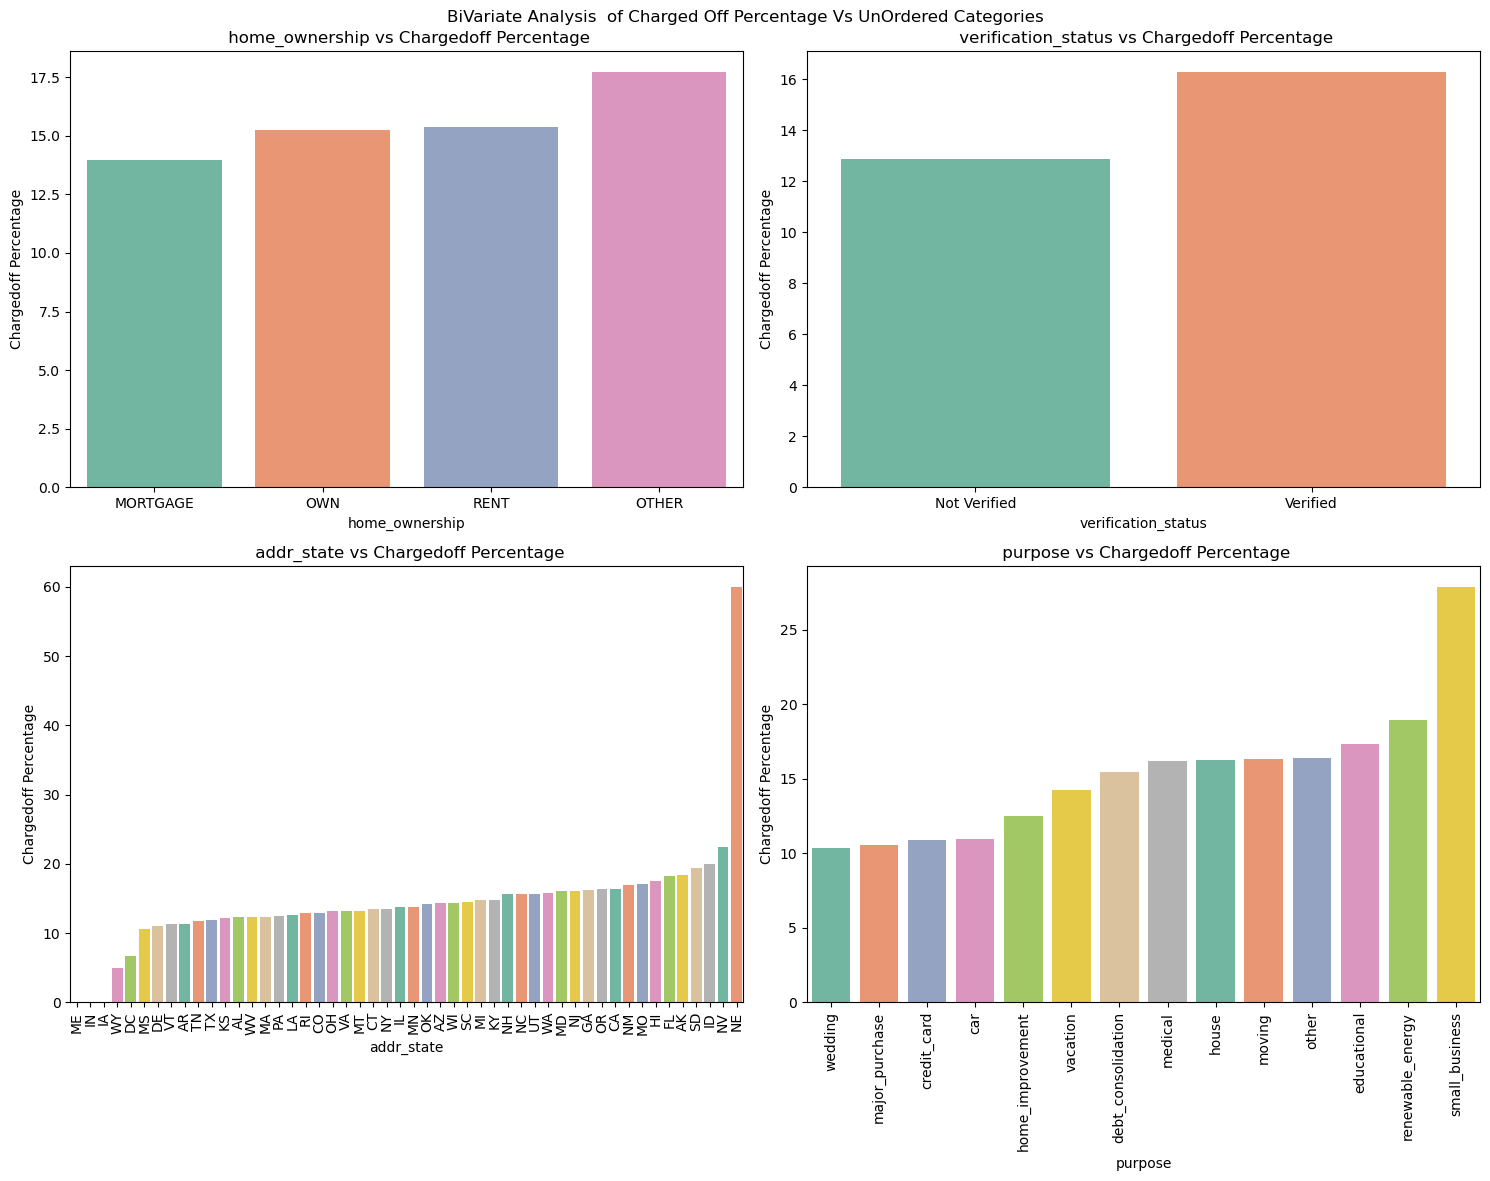

In [140]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('BiVariate Analysis  of Charged Off Percentage Vs UnOrdered Categories')
for col, ax, i in zip(catg_unordered_cols, axes.flat, range(len(catg_unordered_cols))):
    df = df_unord_vs_loan_lst[i]
    sns.barplot(ax=ax, data=df,x=col, y='Chargedoff_Perc',order=df.sort_values('Chargedoff_Perc')[col], palette="Set2")
    ax.set(title=f' {col} vs Chargedoff Percentage',xlabel=col, ylabel='Chargedoff Percentage')


axes[1][0].tick_params(axis='x', rotation=90)
axes[1][1].tick_params(axis='x', rotation=90)
fig.tight_layout()
plt.show()

##### Observations
    Those who are not owning the home is having high chances of loan defaults.
    Those applicants who is having mortgage is having low chances of loan defaults.
    Those applicants having loan for small bussiness is having high chances for loan defaults.
    Those applicants having loan for wedding is less likely to do loan defaults.
    FL States is having high number of loan defaults
    DC is having low number of loan defaults
    The loans which are verified status is having more number of defaults than not verified status. 
    Verification Status doen't have much of influence on loan default '


##### Observations
 - Debt consolidation is the category where maximum loans are issued and people have defaulted the most in the same category.
 - The loan applicants who live in a rented or mortgaged house are more likely to default
 - The loan applicants who have been verified are defaulting more than the applicants who are not verified
 - Maximum number of Loan applicants are from the state of California (CA), Florida (FL), and New York (NY) and the count of defaulters are 
        more in these states. However considering the percentage of defaulters with respect to total loan applicants, the state IL, MO and VA are 
        most likely to default
        

<h3 style = "color : Blue">  Multivariate Analysis </h3>

#### Correlation Analysis

In [141]:
Correl_cols = ['loan_amnt', 'funded_amnt', 'term', 'int_rate','installment', 'emp_length','annual_inc','dti',  
                    'pub_rec_bankruptcies', 'issue_Month']


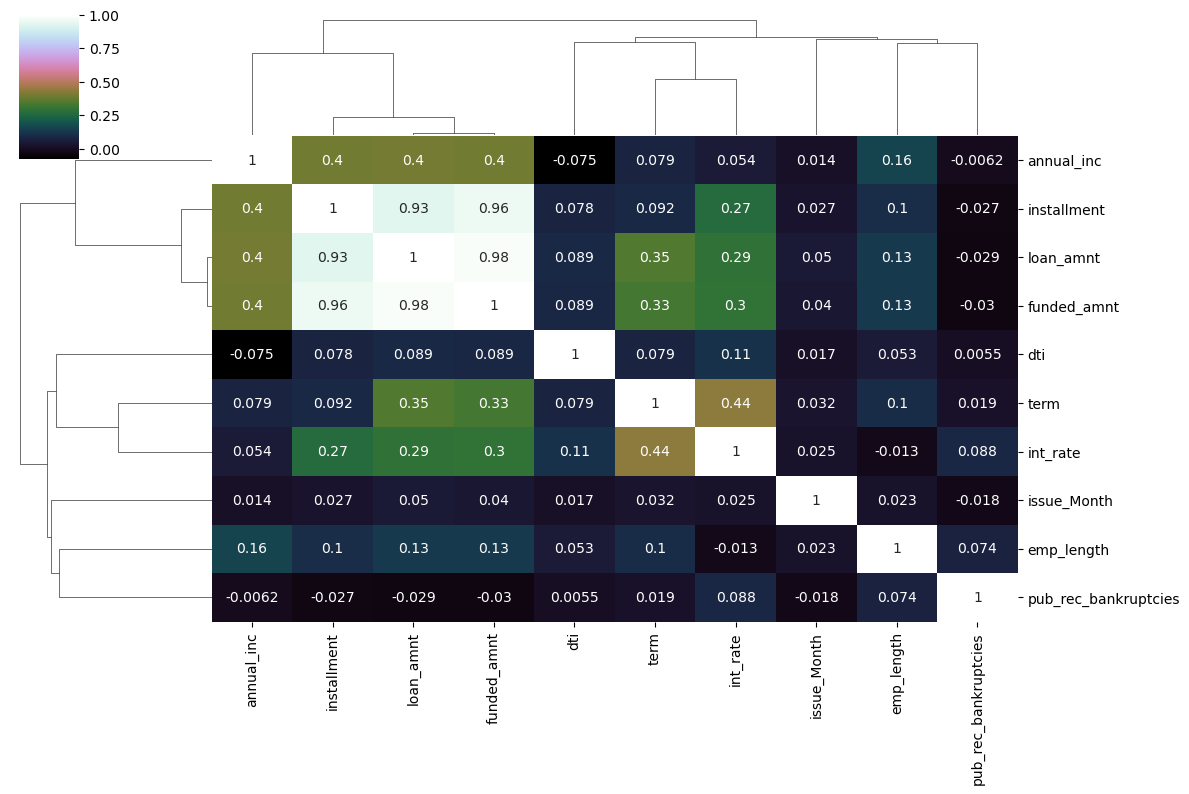

In [142]:
corr = df_loan_final[Correl_cols].corr()
sns.clustermap(corr, annot=True, figsize=(12, 8), cmap="cubehelix")
plt.show()

#### Observations
**Strong/Moderate Correlation**
 -  `Installment` has a strong correlation with Loan Amount & Funded Amount
 -  `Annual Income` has a moderate correlation with Loan Amount and Installment
 -  `Term` has a moderate correlation with Interest Rate and Loan Amount
 -  `Interest rate` has a moderate correlation with Loan Amount

**Weak Correlation**
 - `dti` has weak correlation with most of the fields
 - `emp_length` has weak correlation with most of the fields
 - `issue_Month` has weak correlation with most of the fields
   
**Negative Correlation**   
 -  `Annual income` has a weak negative correlation with dti
 -  `Loan Amount` has a weak negative correlation with Public Bankruptcies

### Conclusion

#### Key Findings 
 - Lower the Annual income ( below 40k ), more likely to default. Higher the annual income, the less chances of default.                        
 - Higher the interest rate(above 15%), more likely to default.
 - Higher the Loan Amount (ie Above 15K)  More likely to default
 - Higher the  Installment High (ie.Above USD 800 )   more likely to default 
 - Higher the debt to income ratio (dti) %), more likely to default 
 - When Revolving Balance is more there is a slightly more chances of charged-off 
 - Revolving Line Utilization  - When revolv-util percentage increases, chances of defaulting also increases. When it is below 25%,
       there is less chances default and when it is above 75%, there is a high chances of default 
 - Loan applicants applying loan for grade G are more likely to default than any other category and grades A and B are less likely to default    
 - Loan applicants applying loan for 60 months are more likely to default than the one taking loan for 36 months    
 - Loan applicants applying loan having employment length 10+ years are more likely to default than the one having lesser years    
 - Loan applicants who are having high public record of bankruptcies/derogatory records are more likely to default.
   Lower the Bankruptcies lower the risk.
 - Those who are not owning the home is having high chances of loan defaults. 
     Those applicants who are having mortgage is less likely to default. 
 - Those applicants having loan taken for small business is having high chances of defaults.    
    Those applicants having loan for wedding is less likely to do loan defaults.    
 - Florida States is having high number of loan defaults    DC is having low number of loan defaults
#### Recommendations
 - Underwriting Criteria:

        Consider stricter criteria for lower grades and sub-grades 
        Prioritize applicants with lower DTIs and higher incomes 

 - Loan Terms 

        Offer shorter loan terms to mitigate risk, especially for higher-risk applicants 

 - Interest Rates    

        Implement more targeted pricing strategies based on borrower risk factors 

 - Verification    

        Strengthen income verification processes to reduce information asymmetry
